<a href="https://colab.research.google.com/github/n09b/HelloWorld/blob/master/PROJ_python%EC%9D%84_%EC%9D%B4%EC%9A%A9%ED%95%9C_k%EB%A6%AC%EA%B7%B8_%EA%B4%80%EC%A4%91%EC%88%98_%EC%98%88%EC%B8%A1_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터 분석 준비


#### 구글 드라이브 연동

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


### 그래프 준비


In [0]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
# 노트북 안에 그래프를 그리기 위해
%matplotlib inline

# 그래프에서 격자로 숫자 범위가 눈에 잘 띄도록 ggplot 스타일을 사용
plt.style.use('ggplot')

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

### 한글 폰트

In [0]:
'''
import matplotlib.font_manager as fm 
!apt-get update -qq
!apt-get install fonts-nanum* -qq

def current_font():
  print(f"설정 폰트 글꼴: {plt.rcParams['font.family']}, 설정 폰트 사이즈: {plt.rcParams['font.size']}")  # 파이썬 3.6 이상 사용가능하다
        
current_font()
path = '/usr/share/fonts/truetype/nanum/NanumBarunGothicBold.ttf'  # 설치된 나눔글꼴중 원하는 녀석의 전체 경로를 가져오자
font_name = fm.FontProperties(fname=path, size=12).get_name()
print(font_name)
plt.rc('font', family=font_name)
fm._rebuild()
'''

'\nimport matplotlib.font_manager as fm \n!apt-get update -qq\n!apt-get install fonts-nanum* -qq\n\ndef current_font():\n  print(f"설정 폰트 글꼴: {plt.rcParams[\'font.family\']}, 설정 폰트 사이즈: {plt.rcParams[\'font.size\']}")  # 파이썬 3.6 이상 사용가능하다\n        \ncurrent_font()\npath = \'/usr/share/fonts/truetype/nanum/NanumBarunGothicBold.ttf\'  # 설치된 나눔글꼴중 원하는 녀석의 전체 경로를 가져오자\nfont_name = fm.FontProperties(fname=path, size=12).get_name()\nprint(font_name)\nplt.rc(\'font\', family=font_name)\nfm._rebuild()\n'

# 데이터 셋 확인

### 데이터 가져오기

In [0]:
data = pd.read_csv('/content/drive/My Drive/DATA.csv', parse_dates={'DATETIME':['DATE','TIME']})
#data = pd.read_csv('DATA2.csv', parse_dates={'DATETIME':['DATE','TIME']})


In [0]:
data["year"] = data["DATETIME"].dt.year
data["month"] = data["DATETIME"].dt.month
data["day"] = data["DATETIME"].dt.day
data["hour"] = data["DATETIME"].dt.hour
data["minute"] = data["DATETIME"].dt.minute
data["dayofweek"] = data["DATETIME"].dt.dayofweek
data.shape

(2550, 28)

### 변수확인

종속변수 - ATTENDANCE <BR>
<BR>
연속형 - ATTENDANCE, SEAT, TEMPERATURE, DUST, POPULATON, WIN, LOSE, RECORD, A_WIN  <BR>
범주형 - LEAGUE, HOLIDAY, HOME, AWAY, STADIUM, WEATHER, RANK, A_RANK, APPEAL, HIT, DERBY, OPENING, year, month, day, hour, dayofweek
  


In [0]:
# 데이터 타입 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2550 entries, 0 to 2549
Data columns (total 28 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   DATETIME     2550 non-null   datetime64[ns]
 1   LEAGUE       2550 non-null   int64         
 2   HOLIDAY      2550 non-null   bool          
 3   HOME         2550 non-null   int64         
 4   AWAY         2550 non-null   int64         
 5   STADIUM      2550 non-null   bool          
 6   ATTENDANCE   2550 non-null   int64         
 7   SEAT         2550 non-null   int64         
 8   WEATHER      2550 non-null   int64         
 9   TEMPERATURE  2550 non-null   int64         
 10  DUST         2550 non-null   int64         
 11  RANK         2550 non-null   int64         
 12  A_RANK       2550 non-null   int64         
 13  POPULATION   2550 non-null   int64         
 14  WIN          2550 non-null   int64         
 15  LOSE         2550 non-null   int64         
 16  RECORD

### RAW 데이터 확인

#### 단변수

##### 연속형 변수 <BR>

정규분포 - X <BR>
비정규분포 

상관계수 -> Spearman    

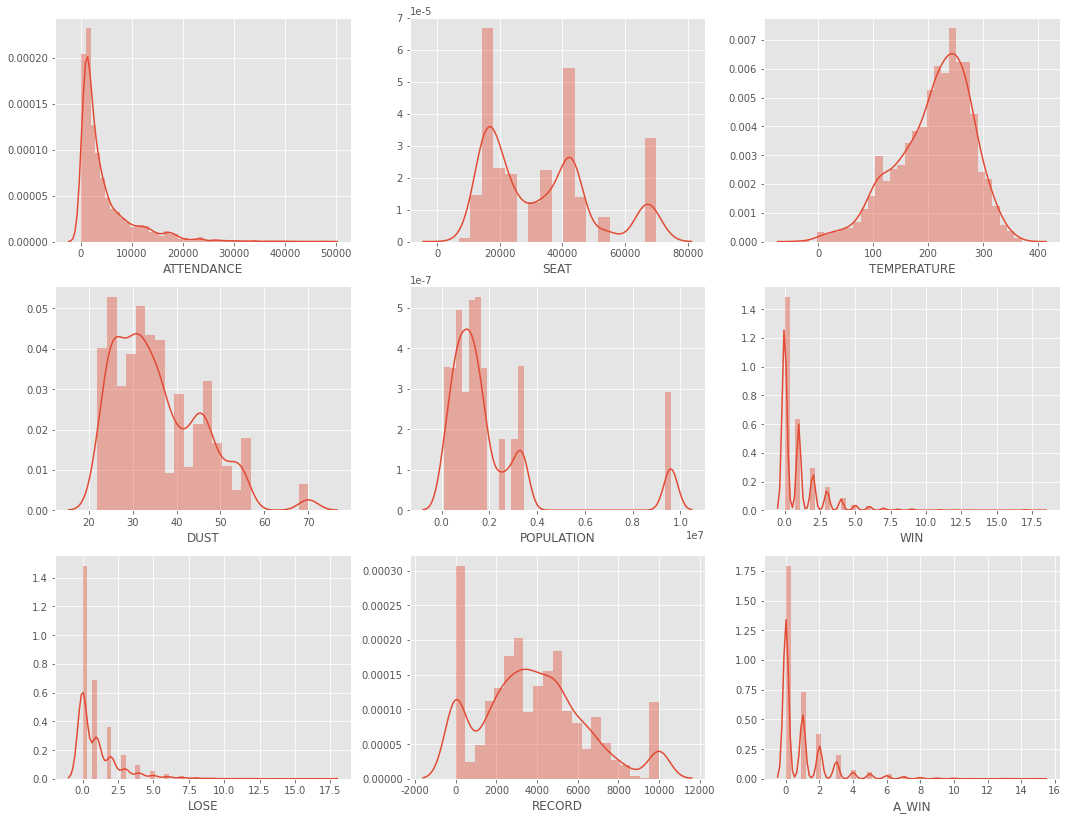

In [0]:
figure, ((ax1,ax2,ax3), (ax4,ax5,ax6),(ax7,ax8,ax9)) = plt.subplots(nrows=3, ncols=3)
figure.set_size_inches(18,14)

sns.distplot(data["ATTENDANCE"], ax=ax1)
sns.distplot(data["SEAT"], ax=ax2)
sns.distplot(data["TEMPERATURE"], ax=ax3)
sns.distplot(data["DUST"], ax=ax4)
sns.distplot(data["POPULATION"], ax=ax5)
sns.distplot(data["WIN"], ax=ax6)
sns.distplot(data["LOSE"], ax=ax7)
sns.distplot(data["RECORD"], ax=ax8)
sns.distplot(data["A_WIN"], ax=ax9)


##### 범주형 변수

명목 - LEAGUE, HOLIDAY, HOME, AWAY, STADIUM, APPEAL, HIT, DERBY, OPENING, year, month, day, hour, minute, dayofweek <BR>
순위 - WEATHER, RANK, A_RANK  

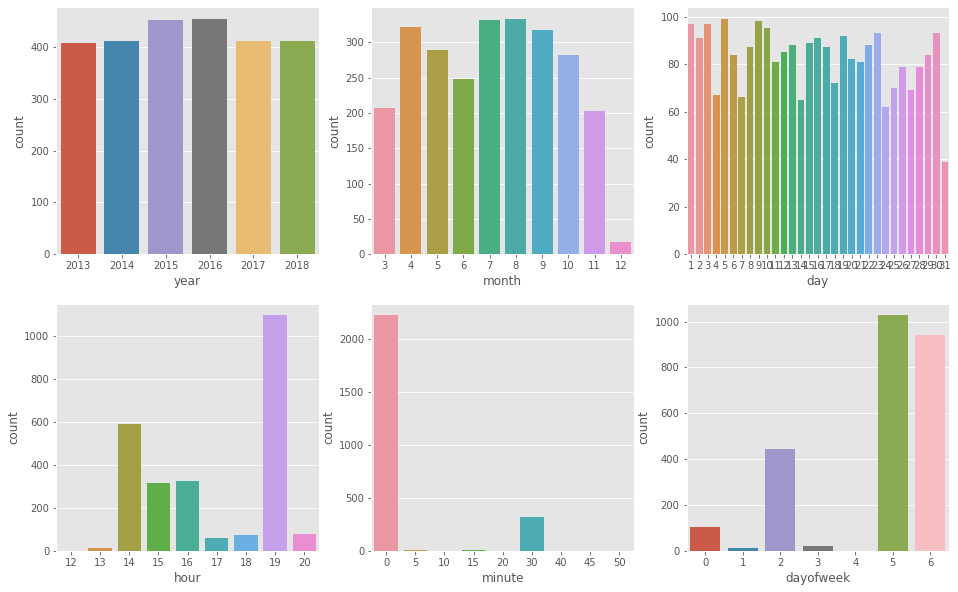

In [0]:
figure, ((ax1,ax2,ax3),(ax4, ax5,ax6)) = plt.subplots(nrows=2, ncols=3)
figure.set_size_inches(16,10)

sns.countplot(data["year"], ax=ax1)
sns.countplot(data["month"], ax=ax2)
sns.countplot(data["day"], ax=ax3)
sns.countplot(data["hour"], ax=ax4)
sns.countplot(data["minute"], ax=ax5)
sns.countplot(data["dayofweek"], ax=ax6)

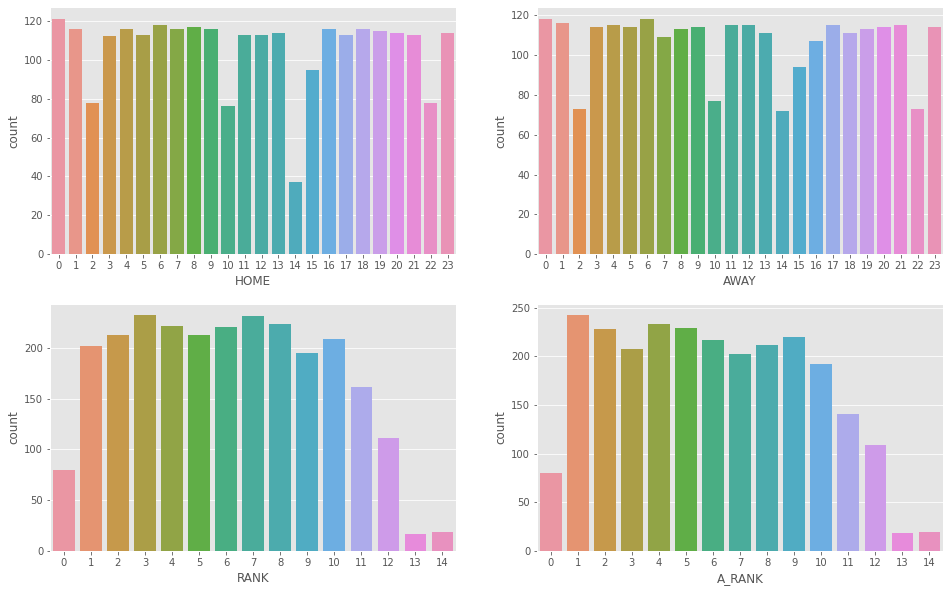

In [0]:
figure, ((ax1,ax2),(ax3, ax4)) = plt.subplots(nrows=2, ncols=2)
figure.set_size_inches(16,10)

sns.countplot(data["HOME"], ax=ax1)
sns.countplot(data["AWAY"], ax=ax2)
sns.countplot(data["RANK"], ax=ax3)
sns.countplot(data["A_RANK"], ax=ax4)

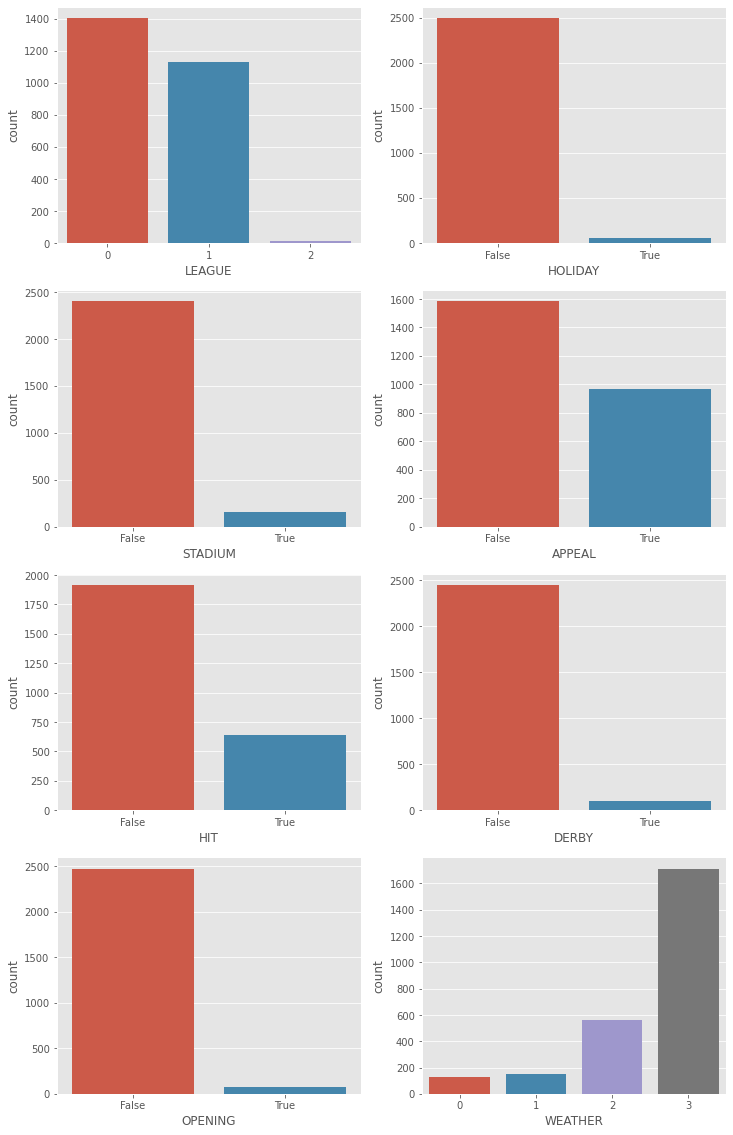

In [0]:
figure, ((ax1,ax2),(ax3,ax4), (ax5,ax6),(ax7,ax8)) = plt.subplots(nrows=4, ncols=2)
figure.set_size_inches(12,20)

sns.countplot(data=data, x="LEAGUE" , ax=ax1)
sns.countplot(data=data, x="HOLIDAY", ax=ax2 )
sns.countplot(data=data, x="STADIUM" , ax=ax3)
sns.countplot(data=data, x="APPEAL", ax=ax4 )
sns.countplot(data=data, x="HIT", ax=ax5 )
sns.countplot(data=data, x="DERBY", ax=ax6 )
sns.countplot(data=data, x="OPENING", ax=ax7 )
sns.countplot(data=data, x="WEATHER" , ax=ax8)

#### 이변수

##### 연속 x 연속 

<BR>
ATTENDANCE x SEAT, TEMPERATURE, DUST, POPULATION, WIN, LOSE, RECORD, A_WIN

"ax1.set_ylabel('',rotation=0, weight='bold')\n#ax1.set_xlabel('hometeam`s winning steak ',rotation=0, weight='bold', size=18)\n\n\nax2.set_ylabel('',rotation=0, weight='bold')\nax2.set_xlabel('hometeam`s losing steak ',rotation=0, weight='bold', size=18)\n\nax3.set_ylabel('',rotation=0, weight='bold')\nax3.set_xlabel('awayteam`s winning steak ',rotation=0, weight='bold', size=18)\n\nax4.set_ylabel(' ',rotation=0, weight='bold')\nax4.set_xlabel('hometeam`s winning rate ',rotation=0, weight='bold', size=18)\n\nax5.set_ylabel(' ',rotation=0, weight='bold')\nax5.set_xlabel('seating capacity',rotation=0, weight='bold', size=18)\n\nax6.set_ylabel(' ',rotation=0, weight='bold')\nax6.set_xlabel('population ',rotation=0, weight='bold', size=18)"

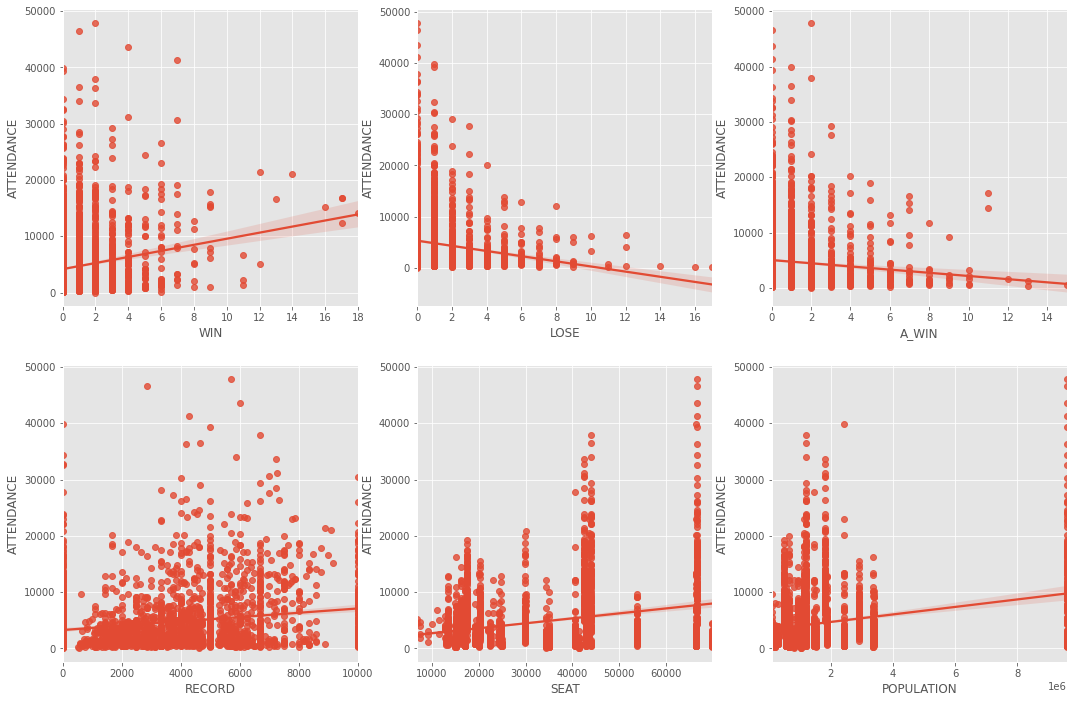

In [0]:
figure, ((ax1,ax2,ax3), (ax4,ax5,ax6)) = plt.subplots(nrows=2, ncols=3)
figure.set_size_inches(18,12)


sns.regplot(x="WIN", y="ATTENDANCE", data=data,ax=ax1)
sns.regplot(x="LOSE", y="ATTENDANCE", data=data,ax=ax2)
sns.regplot(x="A_WIN", y="ATTENDANCE", data=data,ax=ax3)
sns.regplot(x="RECORD", y="ATTENDANCE", data=data,ax=ax4)
sns.regplot(x="SEAT", y="ATTENDANCE", data=data,ax=ax5)
sns.regplot(x="POPULATION", y="ATTENDANCE", data=data,ax=ax6)

'''ax1.set_ylabel('',rotation=0, weight='bold')
#ax1.set_xlabel('hometeam`s winning steak ',rotation=0, weight='bold', size=18)


ax2.set_ylabel('',rotation=0, weight='bold')
ax2.set_xlabel('hometeam`s losing steak ',rotation=0, weight='bold', size=18)

ax3.set_ylabel('',rotation=0, weight='bold')
ax3.set_xlabel('awayteam`s winning steak ',rotation=0, weight='bold', size=18)

ax4.set_ylabel(' ',rotation=0, weight='bold')
ax4.set_xlabel('hometeam`s winning rate ',rotation=0, weight='bold', size=18)

ax5.set_ylabel(' ',rotation=0, weight='bold')
ax5.set_xlabel('seating capacity',rotation=0, weight='bold', size=18)

ax6.set_ylabel(' ',rotation=0, weight='bold')
ax6.set_xlabel('population ',rotation=0, weight='bold', size=18)'''

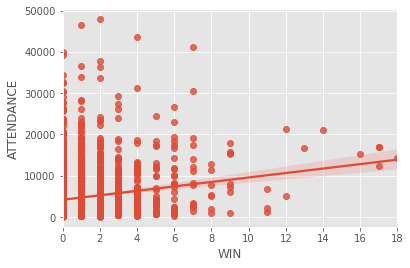

In [0]:
figure, (ax1) = plt.subplots(nrows=1, ncols=1)
sns.regplot(x="WIN", y="ATTENDANCE", data=data, ax=ax1)
#ax1.set_ylabel('attendance',rotation=0, weight='bold')


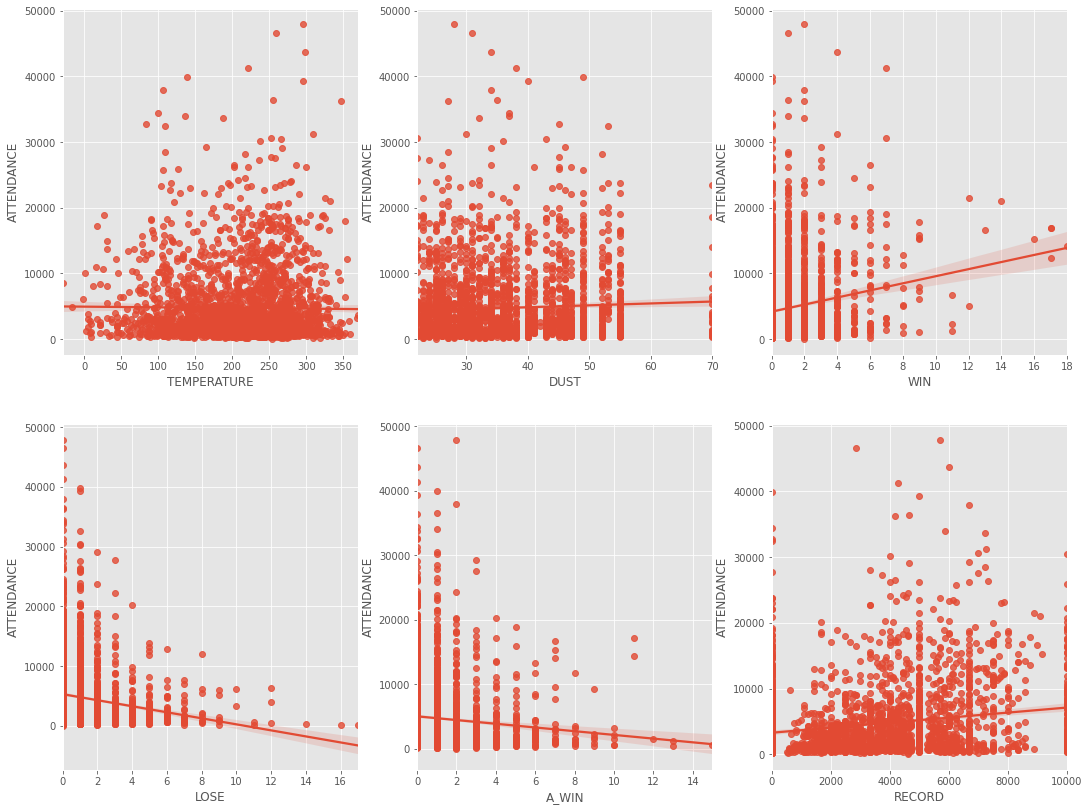

In [0]:
figure, ((ax1,ax2,ax3), (ax4,ax5,ax6)) = plt.subplots(nrows=2, ncols=3)
figure.set_size_inches(18,14)

sns.regplot(x="TEMPERATURE", y="ATTENDANCE", data=data,ax=ax1)
sns.regplot(x="DUST", y="ATTENDANCE", data=data,ax=ax2)
sns.regplot(x="WIN", y="ATTENDANCE", data=data,ax=ax3)
sns.regplot(x="LOSE", y="ATTENDANCE", data=data,ax=ax4)
sns.regplot(x="A_WIN", y="ATTENDANCE", data=data,ax=ax5)
sns.regplot(x="RECORD", y="ATTENDANCE", data=data,ax=ax6)


"\nax1.set_ylabel('',rotation=0, weight='bold')\nax1.set_xlabel('hometeam`s winning steak ',rotation=0, weight='bold', size=14)\nax2.set_ylabel('',rotation=0, weight='bold')\nax2.set_xlabel('hometeam`s losing steak',rotation=0, weight='bold', size=14)\n"

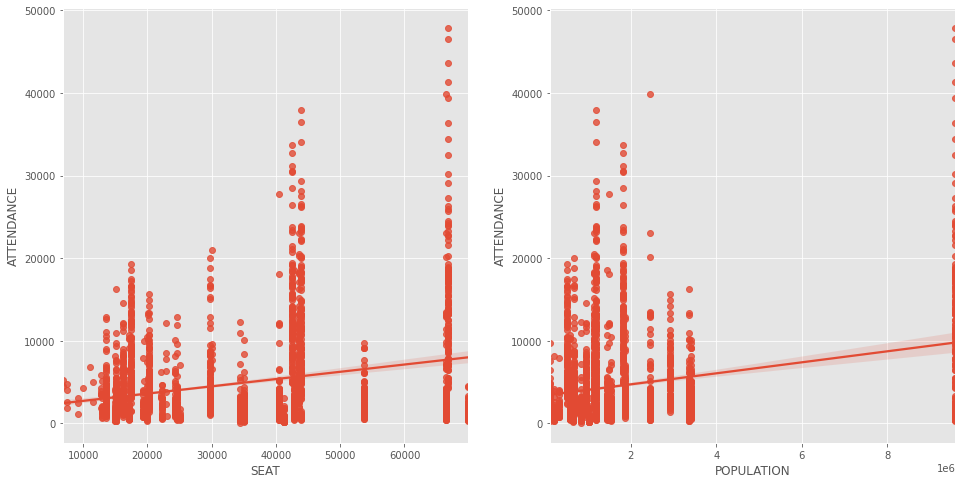

In [0]:
figure, ((ax1,ax2)) = plt.subplots(nrows=1, ncols=2)
figure.set_size_inches(16,8)
sns.regplot(x="SEAT", y="ATTENDANCE", data=data,ax=ax1)
sns.regplot(x="POPULATION", y="ATTENDANCE", data=data,ax=ax2)

'''
ax1.set_ylabel('',rotation=0, weight='bold')
ax1.set_xlabel('hometeam`s winning steak ',rotation=0, weight='bold', size=14)
ax2.set_ylabel('',rotation=0, weight='bold')
ax2.set_xlabel('hometeam`s losing steak',rotation=0, weight='bold', size=14)
'''

##### 연속 x 범주
<BR>

ATTENDANCE x LEAGUE, HOLIDAY, HOME, AWAY, STADIUM, WEATHER, RANK, A_RANK, APPEAL, HIT, DERBY, OPENING


'\nax1.set_ylabel(\'\',rotation=0, weight=\'bold\')\nax1.set_xlabel(\'연도\',rotation=0, weight=\'bold\', size=16)\nax2.set_ylabel(\'\',rotation=0, weight=\'bold\')\nax2.set_xlabel(\'월\',rotation=0, weight=\'bold\', size=16)\n\n#sns.barplot(data=data, x="day", y="ATTENDANCE", ax=ax3)\n#sns.barplot(data=data, x="hour", y="ATTENDANCE", ax=ax4)\n#sns.barplot(data=data, x="minute", y="ATTENDANCE", ax=ax5)\n#sns.barplot(data=data, x="dayofweek", y="ATTENDANCE", ax=ax6)\n\nax1.set_title(\'연도별 관중수\',size=20, color="black",weight="bold")\nax2.set_title("월별 관중수",size=20, color="black",weight="bold")\nax1.tick_params(axis="x", labelsize=16)\nax2.tick_params(axis="x", labelsize=16)\n#ax3.set(xlabel=\'day\', title="일자별 관중수")\n#ax4.set(xlabel=\'hour\', title="시간별 관중수")'

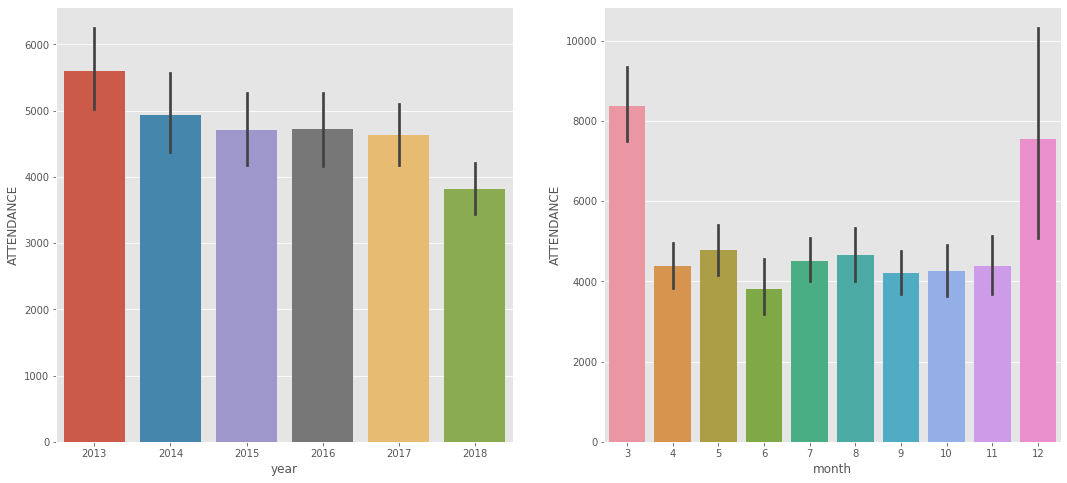

In [0]:
figure, ((ax1,ax2)) = plt.subplots(nrows=1, ncols=2)
figure.set_size_inches(18,8)

sns.barplot(data=data, x="year", y="ATTENDANCE", ax=ax1)
sns.barplot(data=data, x="month", y="ATTENDANCE", ax=ax2)

'''
ax1.set_ylabel('',rotation=0, weight='bold')
ax1.set_xlabel('연도',rotation=0, weight='bold', size=16)
ax2.set_ylabel('',rotation=0, weight='bold')
ax2.set_xlabel('월',rotation=0, weight='bold', size=16)

#sns.barplot(data=data, x="day", y="ATTENDANCE", ax=ax3)
#sns.barplot(data=data, x="hour", y="ATTENDANCE", ax=ax4)
#sns.barplot(data=data, x="minute", y="ATTENDANCE", ax=ax5)
#sns.barplot(data=data, x="dayofweek", y="ATTENDANCE", ax=ax6)

ax1.set_title('연도별 관중수',size=20, color="black",weight="bold")
ax2.set_title("월별 관중수",size=20, color="black",weight="bold")
ax1.tick_params(axis="x", labelsize=16)
ax2.tick_params(axis="x", labelsize=16)
#ax3.set(xlabel='day', title="일자별 관중수")
#ax4.set(xlabel='hour', title="시간별 관중수")'''

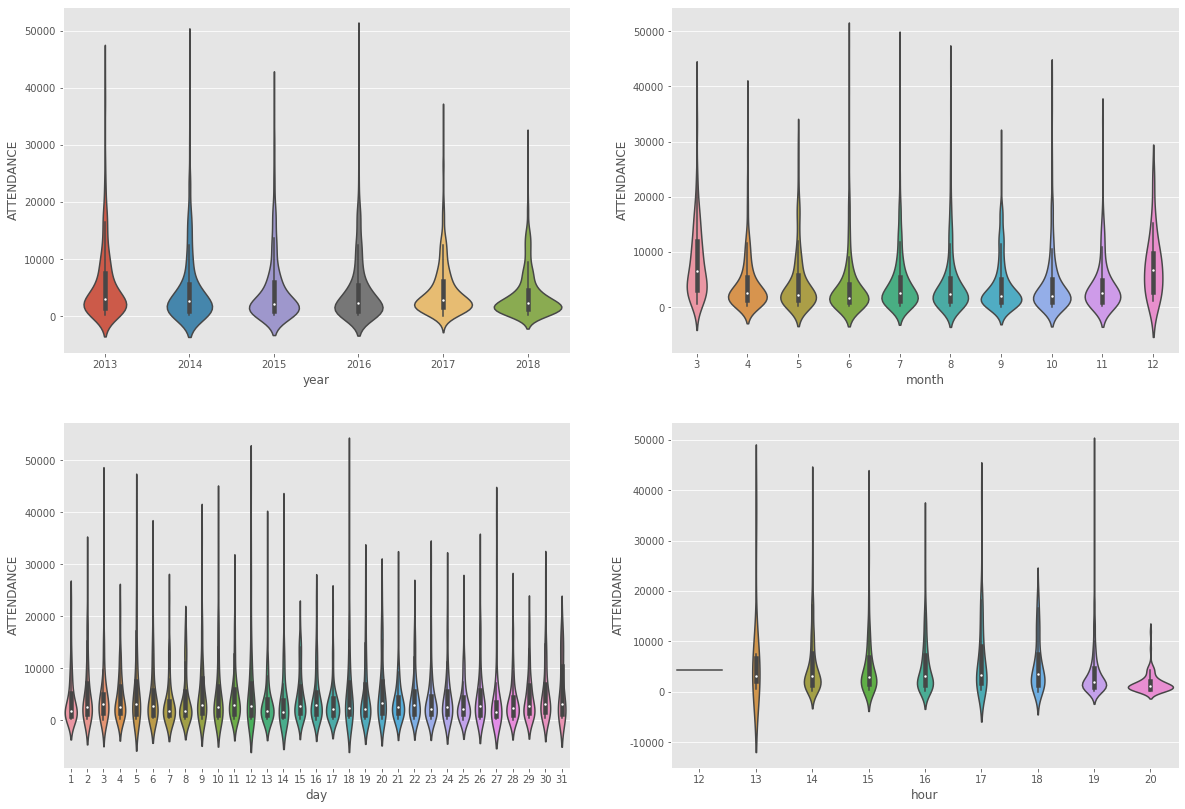

In [0]:
figure, ((ax1,ax2),(ax3, ax4)) = plt.subplots(nrows=2, ncols=2)
figure.set_size_inches(20,14)

sns.violinplot(x="year", y="ATTENDANCE", data=data, ax=ax1)
sns.violinplot(x="month", y="ATTENDANCE", data=data, ax=ax2)
sns.violinplot(x="day", y="ATTENDANCE", data=data, ax=ax3)
sns.violinplot(x="hour", y="ATTENDANCE", data=data, ax=ax4)

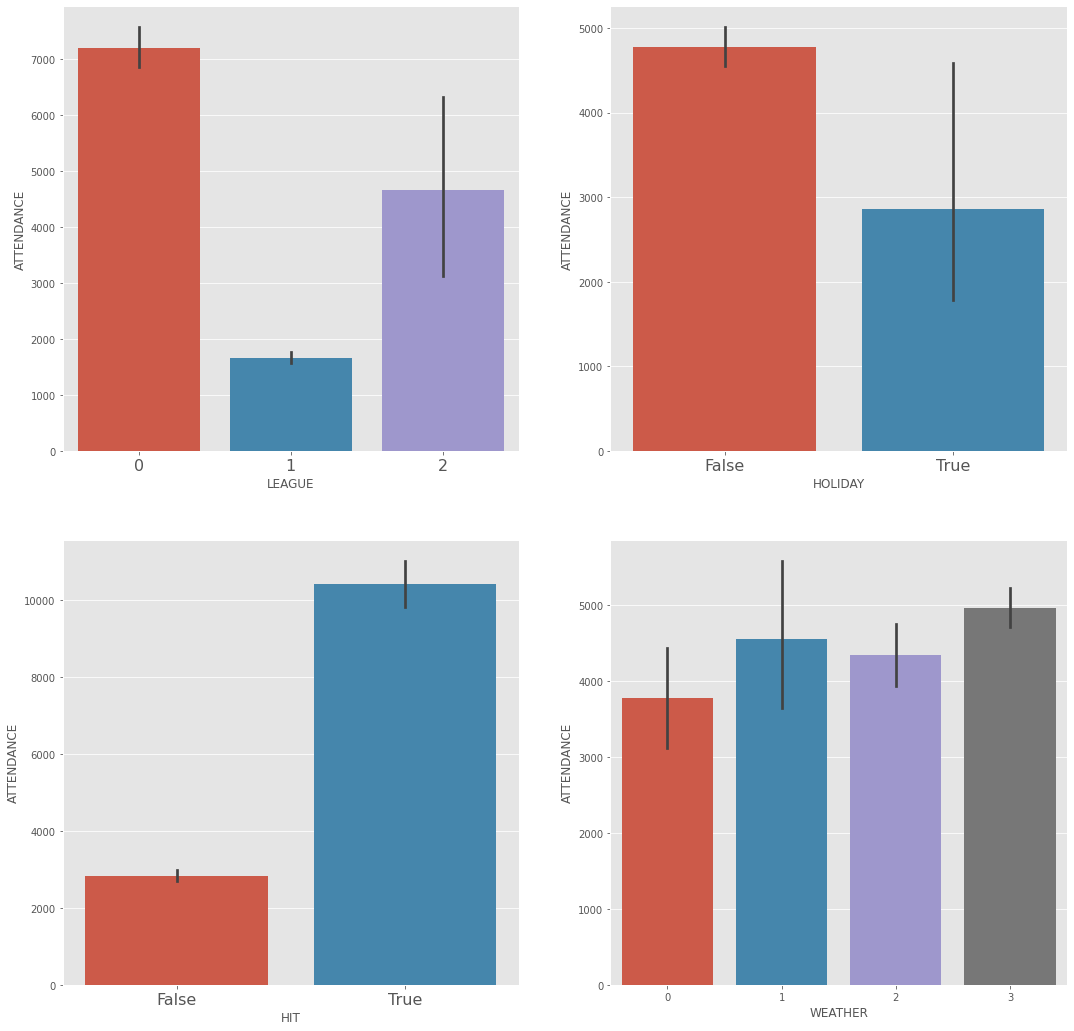

In [0]:
figure, ((ax1,ax2),(ax3,ax4)) = plt.subplots(nrows=2, ncols=2)
figure.set_size_inches(18,18)

sns.barplot(data=data, x="LEAGUE", y="ATTENDANCE", ax=ax1)
sns.barplot(data=data, x="HOLIDAY",  y="ATTENDANCE",ax=ax2 )
sns.barplot(data=data, x="HIT" ,  y="ATTENDANCE",ax=ax3)
#sns.barplot(data=data, x="APPEAL",  y="ATTENDANCE",ax=ax4 )
# sns.barplot(data=data, x="HIT",  y="ATTENDANCE",ax=ax4 )
# sns.barplot(data=data, x="DERBY",  y="ATTENDANCE",ax=ax5 )
# sns.barplot(data=data, x="OPENING",  y="ATTENDANCE",ax=ax6 )
sns.barplot(data=data, x="WEATHER" ,  y="ATTENDANCE",ax=ax4)
'''
ax1.set_ylabel('',rotation=0, weight='bold')
ax1.set_xlabel('리그 차이',rotation=0, weight='bold', size=14)
ax1.set_title('리그별 평균 관중수',size=20, color="black",weight="bold")

ax2.set_ylabel('',rotation=0, weight='bold')
ax2.set_xlabel('공휴일여부',rotation=0, weight='bold', size=14)
ax2.set_title('공휴일여부별 평균 관중수',size=20, color="black",weight="bold")

# ax3.set_ylabel('',rotation=0, weight='bold')
# ax3.set_xlabel('',rotation=0, weight='bold', size=14)
# ax3.set_title('리그별 관중수',size=20, color="black",weight="bold")

ax3.set_ylabel(' ',rotation=0, weight='bold')
ax3.set_xlabel('인기팀여부',rotation=0, weight='bold', size=14)
ax3.set_title('인기팀여부별 평균 관중수',size=20, color="black",weight="bold")

ax4.set_ylabel(' ',rotation=0, weight='bold')
ax4.set_xlabel('날씨',rotation=0, weight='bold', size=14)
ax4.set_title('날씨별 평균 관중수',size=20, color="black",weight="bold")
'''


ax1.tick_params(axis="x", labelsize=16)
ax2.tick_params(axis="x", labelsize=16)
ax3.tick_params(axis="x", labelsize=16)


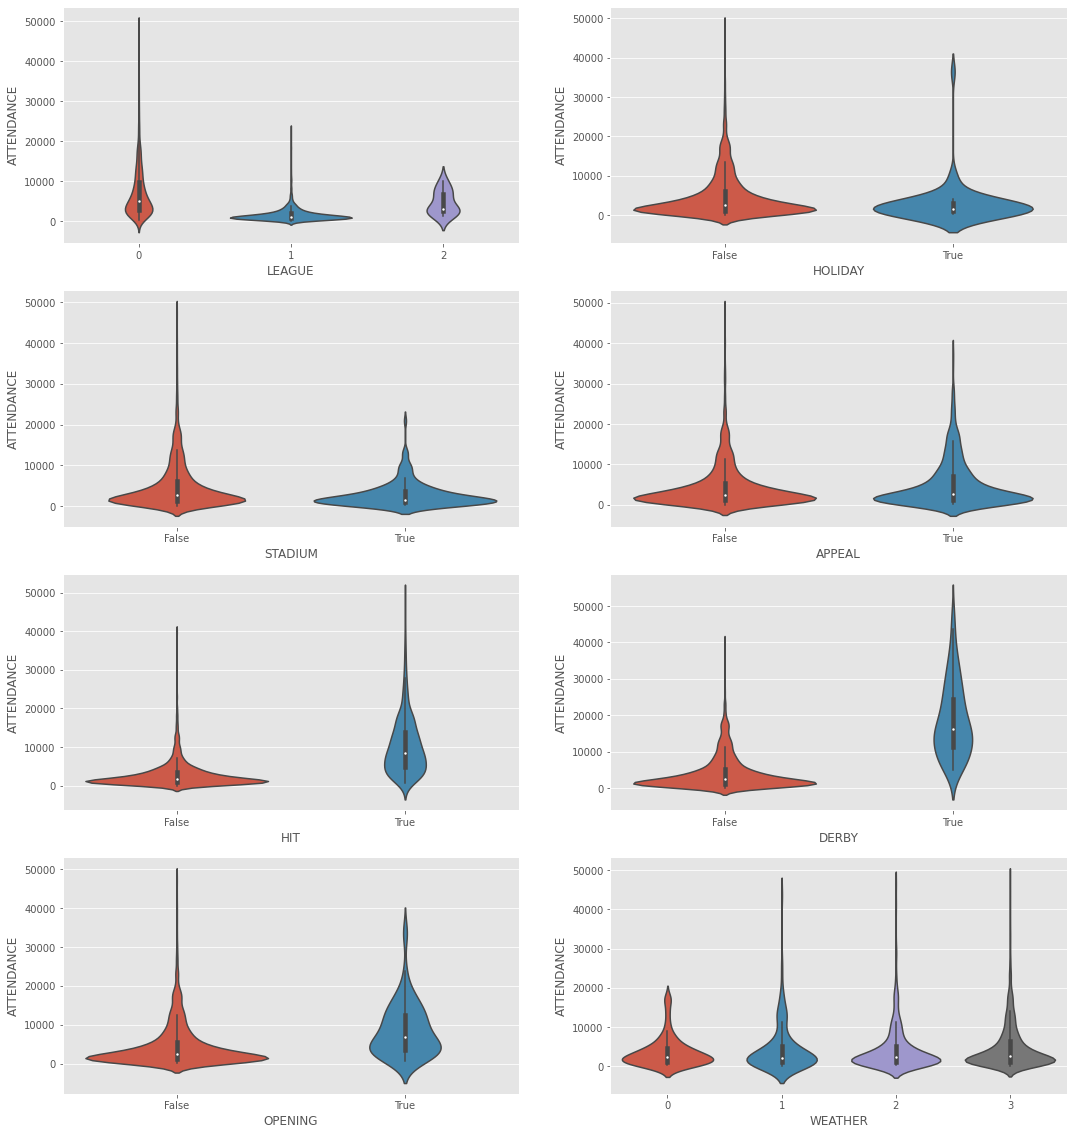

In [0]:
figure, ((ax1,ax2),(ax3, ax4), (ax5,ax6),(ax7,ax8)) = plt.subplots(nrows=4, ncols=2)
figure.set_size_inches(18,20)

sns.violinplot(data=data, x="LEAGUE", y="ATTENDANCE", ax=ax1)
sns.violinplot(data=data, x="HOLIDAY",  y="ATTENDANCE",ax=ax2 )
sns.violinplot(data=data, x="STADIUM" ,  y="ATTENDANCE",ax=ax3)
sns.violinplot(data=data, x="APPEAL",  y="ATTENDANCE",ax=ax4 )
sns.violinplot(data=data, x="HIT",  y="ATTENDANCE",ax=ax5 )
sns.violinplot(data=data, x="DERBY",  y="ATTENDANCE",ax=ax6 )
sns.violinplot(data=data, x="OPENING",  y="ATTENDANCE",ax=ax7 )
sns.violinplot(data=data, x="WEATHER" ,  y="ATTENDANCE",ax=ax8)

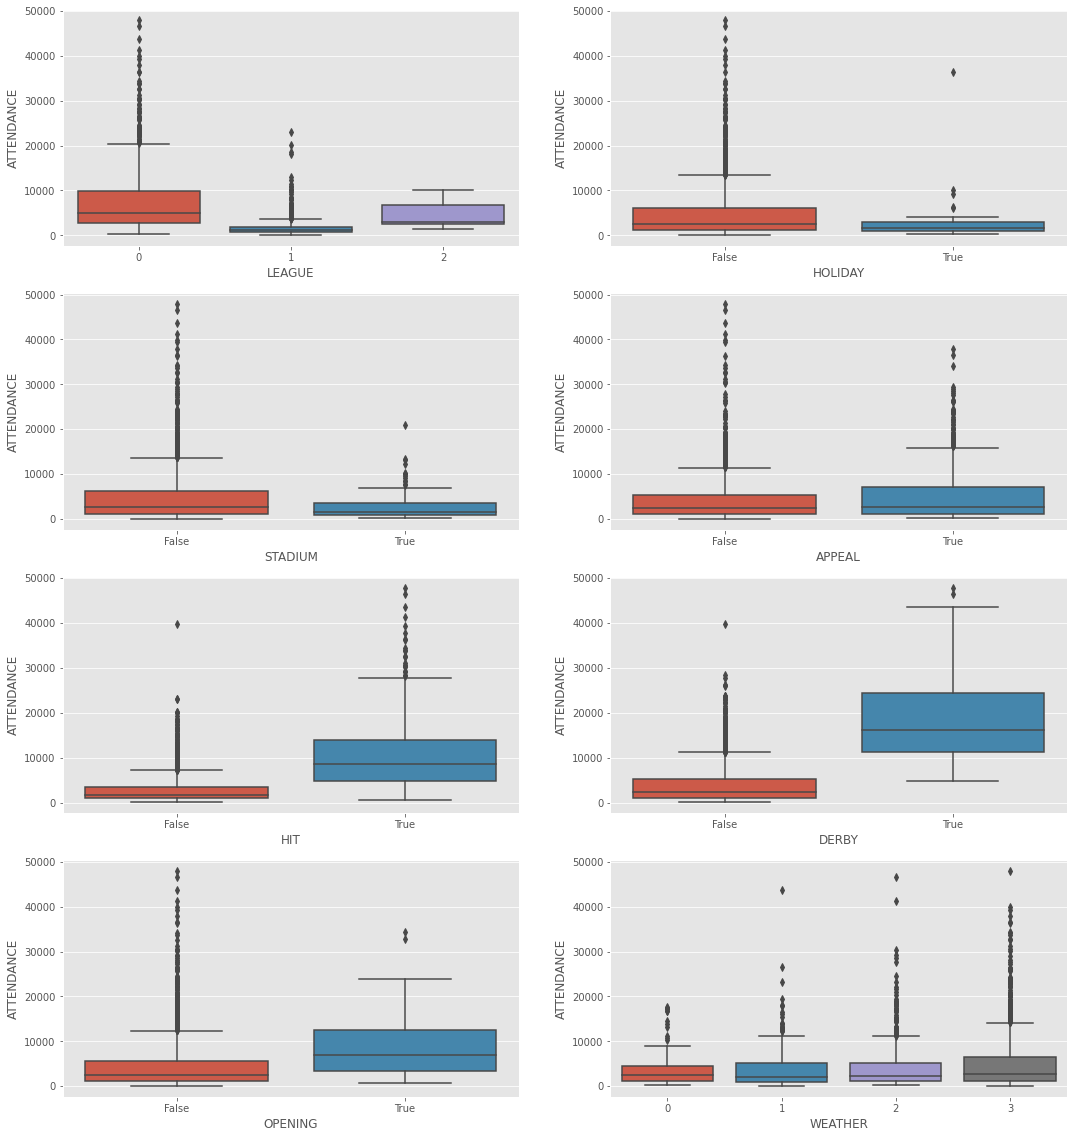

In [0]:
figure, ((ax1,ax2),(ax3, ax4), (ax5,ax6),(ax7,ax8)) = plt.subplots(nrows=4, ncols=2)
figure.set_size_inches(18,20)

sns.boxplot(data=data, x="LEAGUE", y="ATTENDANCE", ax=ax1)
sns.boxplot(data=data, x="HOLIDAY",  y="ATTENDANCE",ax=ax2 )
sns.boxplot(data=data, x="STADIUM" ,  y="ATTENDANCE",ax=ax3)
sns.boxplot(data=data, x="APPEAL",  y="ATTENDANCE",ax=ax4 )
sns.boxplot(data=data, x="HIT",  y="ATTENDANCE",ax=ax5 )
sns.boxplot(data=data, x="DERBY",  y="ATTENDANCE",ax=ax6 )
sns.boxplot(data=data, x="OPENING",  y="ATTENDANCE",ax=ax7 )
sns.boxplot(data=data, x="WEATHER" ,  y="ATTENDANCE",ax=ax8)

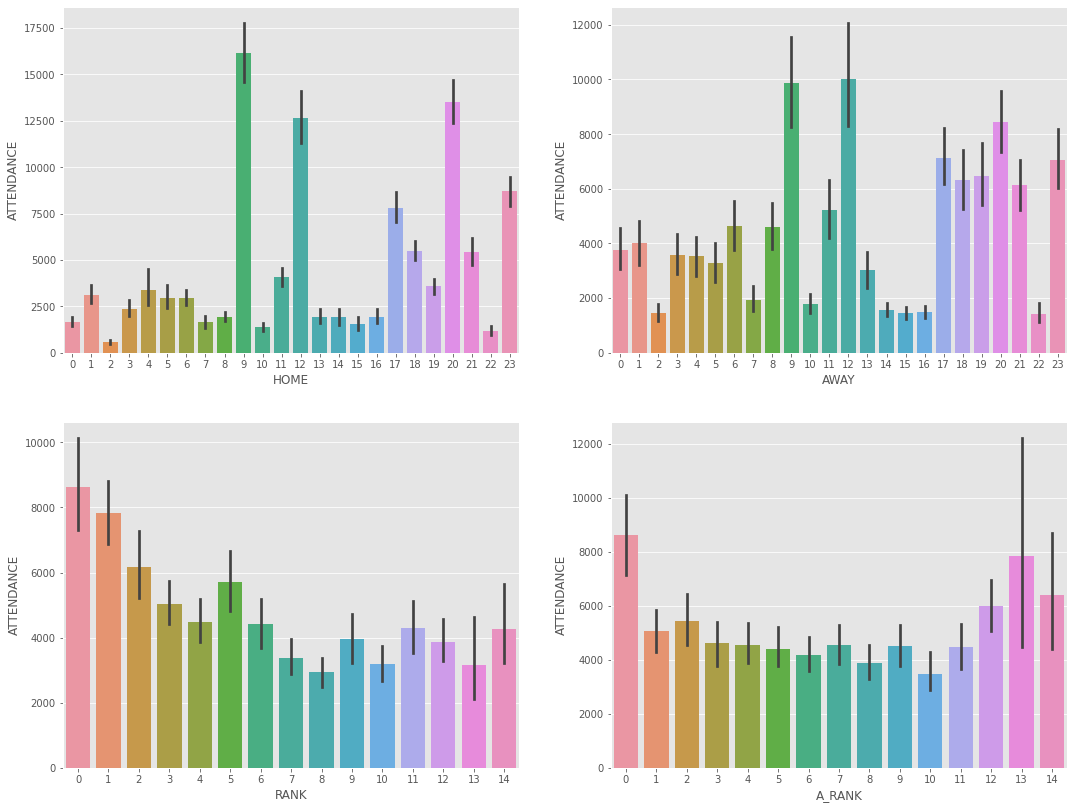

In [0]:
figure, ((ax1,ax2),(ax3, ax4)) = plt.subplots(nrows=2, ncols=2)
figure.set_size_inches(18,14)

sns.barplot(x="HOME", y="ATTENDANCE", data=data, ax=ax1)
sns.barplot(x="AWAY", y="ATTENDANCE", data=data, ax=ax2)
sns.barplot(x="RANK", y="ATTENDANCE", data=data, ax=ax3)
sns.barplot(x="A_RANK", y="ATTENDANCE", data=data, ax=ax4)

# 상관분석

#### pearson

In [0]:
corrMatt = data[["SEAT", "TEMPERATURE", "DUST", "POPULATION", "WIN","LOSE","A_WIN","RECORD", "ATTENDANCE"]]
pearson = corrMatt.corr(method="pearson")
print(pearson)


mask2 = np.array(pearson)

print(mask2)
mask2[np.tril_indices_from(mask2)] = False

                 SEAT  TEMPERATURE      DUST  ...     A_WIN    RECORD  ATTENDANCE
SEAT         1.000000     0.047970  0.010025  ...  0.011833 -0.004816    0.264695
TEMPERATURE  0.047970     1.000000 -0.399194  ...  0.052669  0.096450   -0.011873
DUST         0.010025    -0.399194  1.000000  ... -0.089863 -0.017527    0.050131
POPULATION   0.611205     0.014317 -0.013857  ...  0.007758 -0.071378    0.273467
WIN          0.055558     0.074732 -0.074864  ...  0.001269  0.338592    0.164292
LOSE        -0.026753     0.085665 -0.069433  ...  0.015213 -0.297817   -0.151173
A_WIN        0.011833     0.052669 -0.089863  ...  1.000000  0.003133   -0.083488
RECORD      -0.004816     0.096450 -0.017527  ...  0.003133  1.000000    0.175009
ATTENDANCE   0.264695    -0.011873  0.050131  ... -0.083488  0.175009    1.000000

[9 rows x 9 columns]
[[ 1.          0.04796962  0.01002479  0.61120477  0.05555757 -0.02675303
   0.01183346 -0.00481556  0.26469465]
 [ 0.04796962  1.         -0.39919386  0.0143

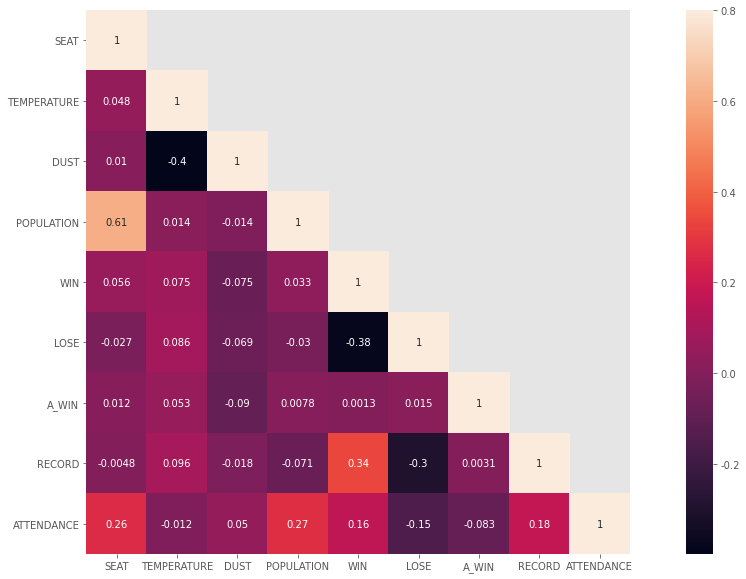

In [0]:
fig, ax = plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(pearson, mask=mask2,vmax=.8, square=True,annot=True)

# label=["SEAT", "TEMPERATURE", "DUST", "POPULATION", "WIN","LOSE","A_WIN","RECORD"]
# # index = np.arange(len(label))
# index =label
# print(mask2[-1])
# m2=[ 0.26469465, -0.01187273,  0.05013143,  0.27346727,  0.1642918 , -0.15117273, -0.08348767 , 0.17500893       ]
# barlist=plt.bar(index, m2)
# barlist[3].set_color('b')
# # # plt.xlabel('Genre', fontsize=5)
# # plt.ylabel('No of Movies', fontsize=5)
# # plt.xticks(index, label, fontsize=5, rotation=30)
# # plt.title('Market Share for Each Genre 1995-2017')
# plt.show()


#### spearman

In [0]:
spearman = corrMatt.corr(method="spearman")
print(spearman)
mask1 = np.array(spearman)
print(mask1[-1])
mask1[np.tril_indices_from(mask1)] = False

                 SEAT  TEMPERATURE      DUST  ...     A_WIN    RECORD  ATTENDANCE
SEAT         1.000000     0.048302  0.008654  ...  0.002090  0.037933    0.174420
TEMPERATURE  0.048302     1.000000 -0.468029  ...  0.040922  0.107263   -0.038853
DUST         0.008654    -0.468029  1.000000  ... -0.059611 -0.065282    0.042705
POPULATION   0.427292     0.008815 -0.000353  ...  0.019030 -0.105175    0.187229
WIN          0.053900     0.068215 -0.064741  ...  0.022907  0.350582    0.084149
LOSE        -0.049194     0.055934 -0.039768  ...  0.023337 -0.278944   -0.149642
A_WIN        0.002090     0.040922 -0.059611  ...  1.000000  0.011469   -0.085061
RECORD       0.037933     0.107263 -0.065282  ...  0.011469  1.000000    0.177452
ATTENDANCE   0.174420    -0.038853  0.042705  ... -0.085061  0.177452    1.000000

[9 rows x 9 columns]
[ 0.17442004 -0.03885265  0.04270453  0.18722875  0.08414907 -0.1496421
 -0.08506144  0.17745182  1.        ]


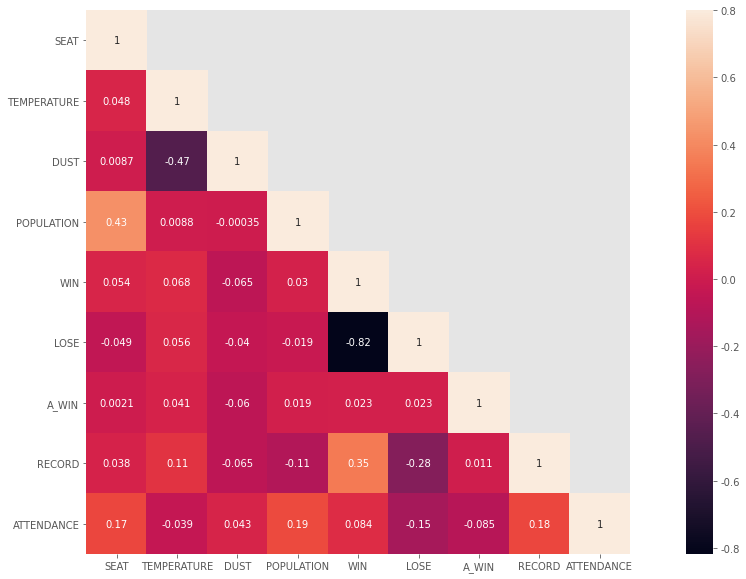

In [0]:
fig, ax = plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(spearman, mask=mask1,vmax=.8, square=True,annot=True)

# label=["SEAT", "TEMPERATURE", "DUST", "POPULATION", "WIN","LOSE","A_WIN","RECORD"]
# # index = np.arange(len(label))
# index =label
# print(mask2[-1])
# m1=[ 0.17442004, -0.03885265,  0.04270453,  0.18722875,  0.08414907, -0.1496421, -0.08506144,  0.17745182       ]
# barlist=plt.bar(index, m1)
# barlist[3].set_color('b')
# # # plt.xlabel('Genre', fontsize=5)
# # plt.ylabel('No of Movies', fontsize=5)
# # plt.xticks(index, label, fontsize=5, rotation=30)
# # plt.title('Market Share for Each Genre 1995-2017')
# plt.show()

In [0]:
# 순서형
rankMatt = data[["SEAT", "TEMPERATURE", "DUST", "POPULATION", "WIN","WEATHER","RANK","A_RANK","ATTENDANCE"]]
spearman2 = rankMatt.corr(method="spearman")
print(spearman2)
mask3 = np.array(spearman2)
print(mask3[-1])
mask3[np.tril_indices_from(mask3)] = False

                 SEAT  TEMPERATURE      DUST  ...      RANK    A_RANK  ATTENDANCE
SEAT         1.000000     0.048302  0.008654  ... -0.067397 -0.013493    0.174420
TEMPERATURE  0.048302     1.000000 -0.468029  ...  0.085823  0.089334   -0.038853
DUST         0.008654    -0.468029  1.000000  ... -0.050660 -0.061249    0.042705
POPULATION   0.427292     0.008815 -0.000353  ...  0.123935  0.047376    0.187229
WIN          0.053900     0.068215 -0.064741  ... -0.342690  0.038178    0.084149
WEATHER     -0.016422    -0.040386  0.127520  ... -0.038936 -0.037096    0.063043
RANK        -0.067397     0.085823 -0.050660  ...  1.000000  0.167495   -0.174692
A_RANK      -0.013493     0.089334 -0.061249  ...  0.167495  1.000000   -0.033087
ATTENDANCE   0.174420    -0.038853  0.042705  ... -0.174692 -0.033087    1.000000

[9 rows x 9 columns]
[ 0.17442004 -0.03885265  0.04270453  0.18722875  0.08414907  0.06304336
 -0.17469208 -0.03308691  1.        ]


[0. 0. 0. 0. 0. 0. 0. 0. 0.]


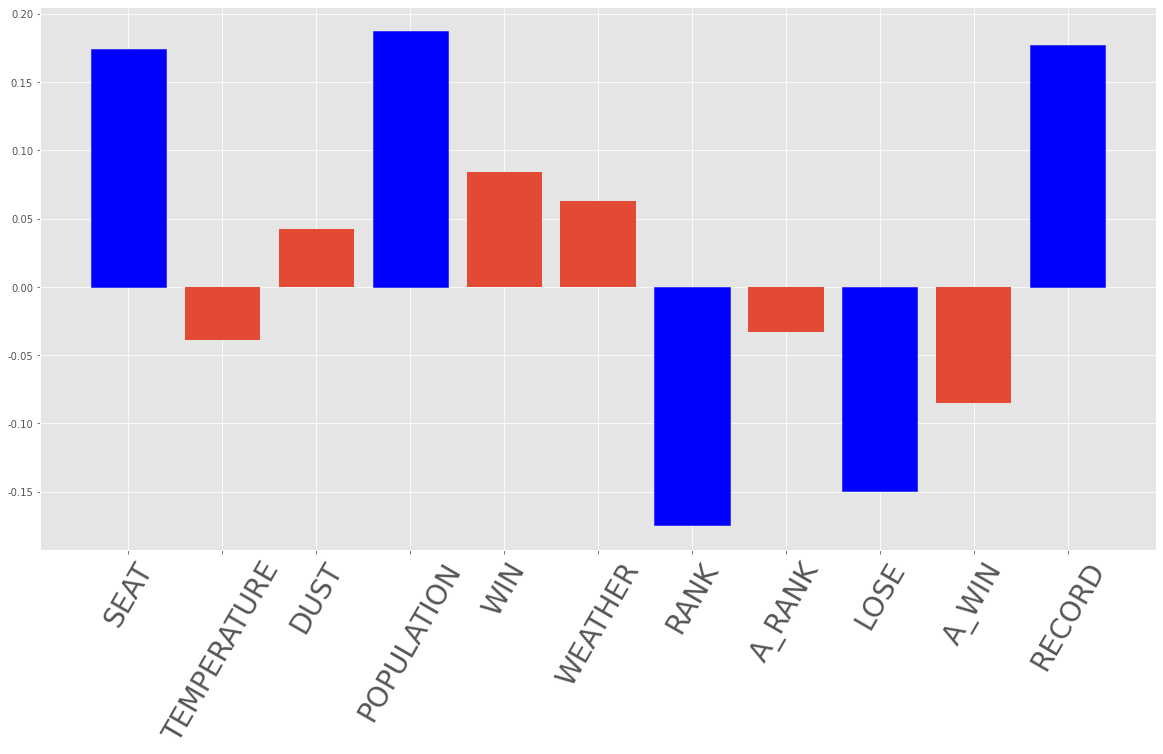

In [0]:
fig, ax = plt.subplots()
fig.set_size_inches(20,10)
# sns.heatmap(spearman2, mask=mask3,vmax=.8, square=True,annot=True,cmap='YlGnBu')

label=["SEAT", "TEMPERATURE", "DUST", "POPULATION", "WIN","WEATHER","RANK","A_RANK","LOSE","A_WIN","RECORD"]
# label=["SEAT", "TEMPERATURE", "DUST", "POPULATION", "WIN","LOSE","A_WIN","RECORD"]
# index = np.arange(len(label))
index =label
print(mask2[-1])
m3=[ 0.17442004, -0.03885265,  0.04270453,  0.18722875,  0.08414907,  0.06304336, -0.17469208, -0.03308691 , -0.1496421, -0.08506144,  0.17745182    ]
# m1=[ 0.17442004, -0.03885265,  0.04270453,  0.18722875,  0.08414907, -0.1496421, -0.08506144,  0.17745182       ]

barlist=plt.bar(index, m3)
barlist[3].set_color('b')
barlist[0].set_color('b')
barlist[6].set_color('b')
barlist[8].set_color('b')
barlist[10].set_color('b')
# # plt.xlabel('Genre', fontsize=5)
# plt.ylabel('No of Movies', fontsize=5)
# plt.xticks(index, label, fontsize=5, rotation=30)
# plt.title('Market Share for Each Genre 1995-2017')
ax.tick_params(axis="x", labelsize=28,rotation=60)
def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height),
                ha='center', va='bottom')
plt.show()

#### kendall

In [0]:
kendall = corrMatt.corr(method="kendall")
print(kendall)
mask4 = np.array(kendall)
print(mask4[-1])
mask4[np.tril_indices_from(mask4)] = False

                 SEAT  TEMPERATURE      DUST  ...     A_WIN    RECORD  ATTENDANCE
SEAT         1.000000     0.032908  0.006052  ...  0.001659  0.025627    0.115533
TEMPERATURE  0.032908     1.000000 -0.321134  ...  0.031041  0.070247   -0.026710
DUST         0.006052    -0.321134  1.000000  ... -0.046354 -0.044384    0.028671
POPULATION   0.327866     0.005797 -0.000191  ...  0.014777 -0.074805    0.126090
WIN          0.041207     0.051634 -0.050079  ...  0.019879  0.275049    0.063563
LOSE        -0.037444     0.042506 -0.030487  ...  0.019984 -0.218956   -0.113365
A_WIN        0.001659     0.031041 -0.046354  ...  1.000000  0.008957   -0.064565
RECORD       0.025627     0.070247 -0.044384  ...  0.008957  1.000000    0.123261
ATTENDANCE   0.115533    -0.026710  0.028671  ... -0.064565  0.123261    1.000000

[9 rows x 9 columns]
[ 0.11553273 -0.02670985  0.0286713   0.12608951  0.0635626  -0.11336549
 -0.06456461  0.12326066  1.        ]


[0. 0. 0. 0. 0. 0. 0. 0. 0.]


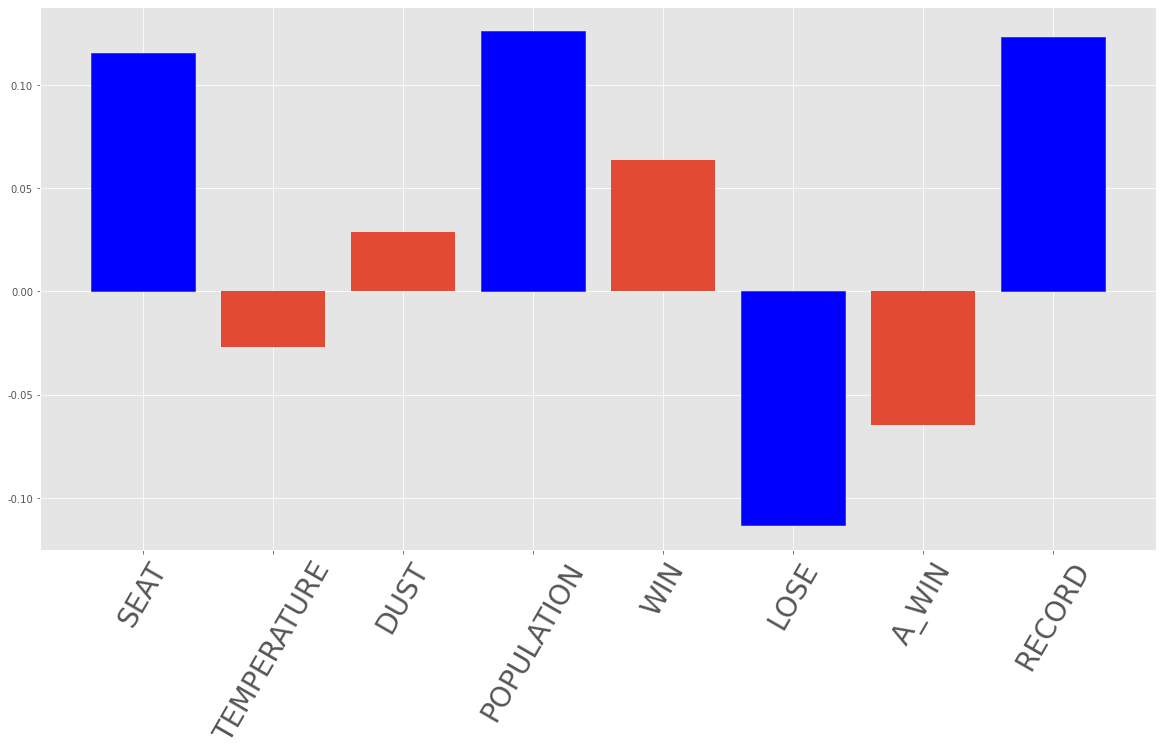

In [0]:
fig, ax = plt.subplots()
fig.set_size_inches(20,10)
# sns.heatmap(kendall, mask=mask4,vmax=.8, square=True,annot=True,cmap='RdYlGn_r')

label=["SEAT", "TEMPERATURE", "DUST", "POPULATION", "WIN","LOSE","A_WIN","RECORD"]
# index = np.arange(len(label))
index =label
print(mask2[-1])
m4=[ 0.11553273, -0.02670985,  0.0286713,   0.12608951,  0.0635626,  -0.11336549, -0.06456461,  0.12326066          ]
barlist=plt.bar(index, m4)
barlist[3].set_color('b')
barlist[0].set_color('b')
barlist[5].set_color('b')
barlist[7].set_color('b')
# # plt.xlabel('Genre', fontsize=5)
# plt.ylabel('No of Movies', fontsize=5)
# plt.xticks(index, label, fontsize=5, rotation=30)
# plt.title('Market Share for Each Genre 1995-2017')
ax.tick_params(axis="x", labelsize=28,rotation=60)

plt.show()


#### point-biserial

PointbiserialrResult(correlation=-0.04793434486570017, pvalue=0.015487652792846258)
PointbiserialrResult(correlation=-0.0832326940973737, pvalue=2.5731314200882944e-05)
PointbiserialrResult(correlation=0.04619203918812455, pvalue=0.01966467934376011)
PointbiserialrResult(correlation=0.5753800433107714, pvalue=9.548472100573852e-225)
PointbiserialrResult(correlation=0.5088430171213495, pvalue=4.999748681263322e-168)
PointbiserialrResult(correlation=0.12083470477938567, pvalue=9.281340771468912e-10)
PointbiserialrResult(correlation=-0.4702318038692649, pvalue=1.823173908682331e-140)


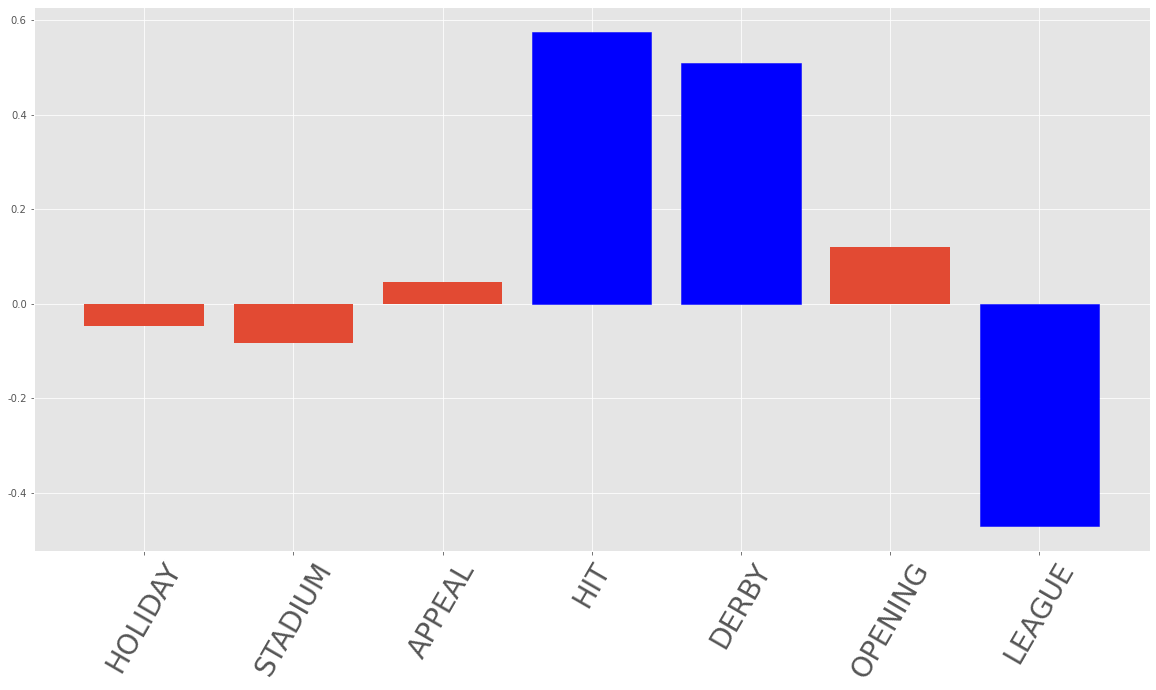

In [0]:
from scipy import stats
ho=stats.pointbiserialr(x=data["ATTENDANCE"], y=data["HOLIDAY"])
st=stats.pointbiserialr(x=data["ATTENDANCE"], y=data["STADIUM"])
ap=stats.pointbiserialr(x=data["ATTENDANCE"], y=data["APPEAL"])
hit=stats.pointbiserialr(x=data["ATTENDANCE"], y=data["HIT"])
de=stats.pointbiserialr(x=data["ATTENDANCE"], y=data["DERBY"])
op=stats.pointbiserialr(x=data["ATTENDANCE"], y=data["OPENING"])
le=stats.pointbiserialr(x=data["ATTENDANCE"], y=data["LEAGUE"])
at=[1,0]


print(ho,st,ap,hit,de,op,le,sep='\n')
# print(ho[0])
# df=pd.DataFrame(columns=["HOLIDAY","STADIUM","APPEAL","HIT","DERBY","OPENING","LEAGUE","ATTENDANCE"])
# df.loc[0]=[ho[0],st[0],ap[0],hit[0],de[0],op[0],le[0],at[0]]
# df.rename(index={0:'ATTENDANCE'})
# sns.heatmap(df,annot=True)
fig, ax = plt.subplots()

fig.set_size_inches(20,10)

label=["HOLIDAY","STADIUM","APPEAL","HIT","DERBY","OPENING","LEAGUE"]
# index = np.arange(len(label))
index =label
# print(mask2[-1])
mm=[ho[0],st[0],ap[0],hit[0],de[0],op[0],le[0]]
barlist=plt.bar(index, mm)
barlist[3].set_color('b')
barlist[4].set_color('b')
barlist[6].set_color('b')
# # plt.xlabel('Genre', fontsize=5)
# plt.ylabel('No of Movies', fontsize=5)
# plt.xticks(index, label, fontsize=5, rotation=30)
# plt.title('Market Share for Each Genre 1995-2017')
ax.tick_params(axis="x", labelsize=28,rotation=60)

plt.show()


# Feature Engineering

#### 데이터 타입 변환

In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2550 entries, 0 to 2549
Data columns (total 28 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   DATETIME     2550 non-null   datetime64[ns]
 1   LEAGUE       2550 non-null   int64         
 2   HOLIDAY      2550 non-null   bool          
 3   HOME         2550 non-null   int64         
 4   AWAY         2550 non-null   int64         
 5   STADIUM      2550 non-null   bool          
 6   ATTENDANCE   2550 non-null   int64         
 7   SEAT         2550 non-null   int64         
 8   WEATHER      2550 non-null   int64         
 9   TEMPERATURE  2550 non-null   int64         
 10  DUST         2550 non-null   int64         
 11  RANK         2550 non-null   int64         
 12  A_RANK       2550 non-null   int64         
 13  POPULATION   2550 non-null   int64         
 14  WIN          2550 non-null   int64         
 15  LOSE         2550 non-null   int64         
 16  RECORD

In [0]:
categorical_feature_names = ["HOME","AWAY","WEATHER","RANK","A_RANK","dayofweek","month","hour"]

for var in categorical_feature_names:
    data[var] = data[var].astype("category")
    data[var] = data[var].astype("category")

#### 정규화

In [0]:
data["npop"]=(data["POPULATION"]-data["POPULATION"].min()) /(data["POPULATION"].max()-data["POPULATION"].min())
data["nseat"]=(data["SEAT"]-data["SEAT"].min()) /(data["SEAT"].max()-data["SEAT"].min())
data["nrecord"]=(data["RECORD"]-data["RECORD"].min()) /(data["RECORD"].max()-data["RECORD"].min())

In [0]:
data.nseat.describe()

count    2550.000000
mean        0.414471
std         0.271693
min         0.000000
25%         0.163838
50%         0.364110
75%         0.571365
max         1.000000
Name: nseat, dtype: float64

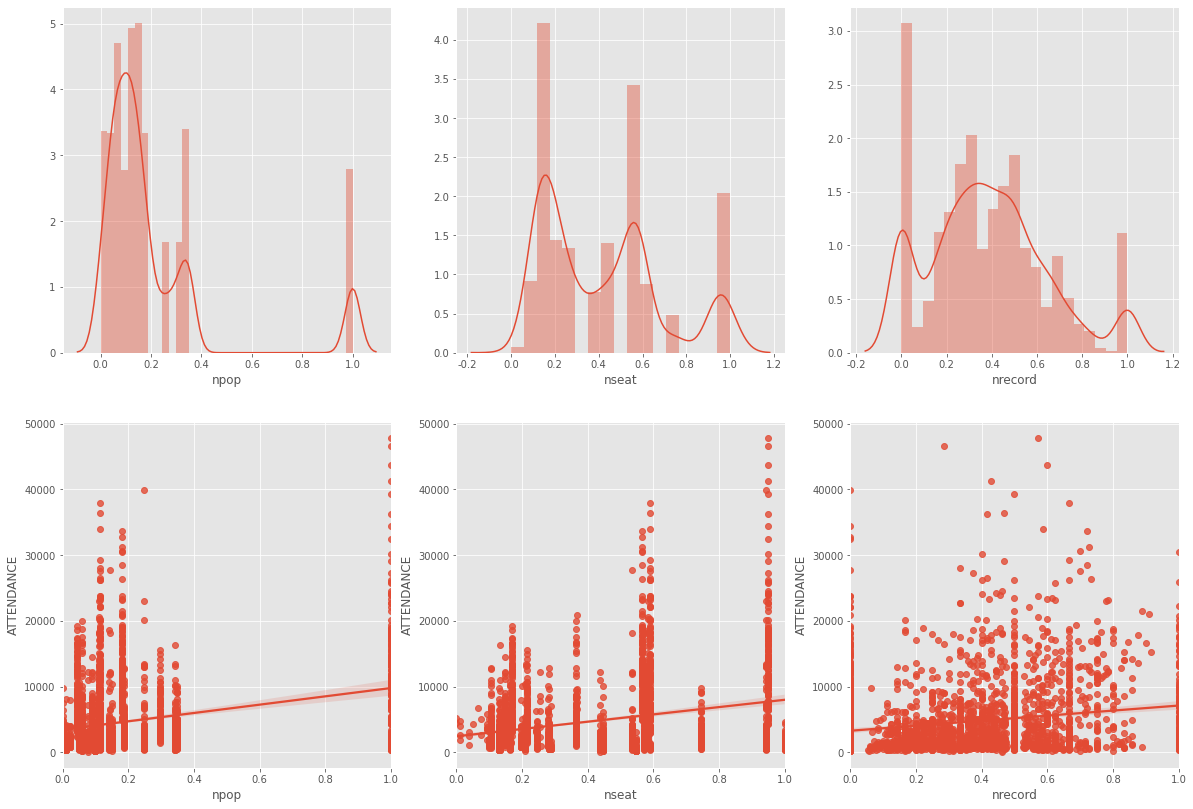

In [0]:
figure, ((ax1,ax2,ax3),(ax4,ax5,ax6)) = plt.subplots(nrows=2, ncols=3)
figure.set_size_inches(20,14)

sns.distplot(data["npop"], ax=ax1)
sns.distplot(data["nseat"], ax=ax2)
sns.distplot(data["nrecord"], ax=ax3)
sns.regplot(x="npop", y="ATTENDANCE", data=data,ax=ax4)
sns.regplot(x="nseat", y="ATTENDANCE", data=data,ax=ax5)
sns.regplot(x="nrecord", y="ATTENDANCE", data=data,ax=ax6)

#### LEAGUE=2 -> LEAGUE = 1


In [0]:
data.loc[data.LEAGUE==2, 'LEAGUE'] = 1
data.LEAGUE.value_counts()


0    1406
1    1144
Name: LEAGUE, dtype: int64

In [0]:
data["LEAGUE"] = data["LEAGUE"].astype("bool")

In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2550 entries, 0 to 2549
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   DATETIME     2550 non-null   datetime64[ns]
 1   LEAGUE       2550 non-null   bool          
 2   HOLIDAY      2550 non-null   bool          
 3   HOME         2550 non-null   category      
 4   AWAY         2550 non-null   category      
 5   STADIUM      2550 non-null   bool          
 6   ATTENDANCE   2550 non-null   int64         
 7   SEAT         2550 non-null   int64         
 8   WEATHER      2550 non-null   category      
 9   TEMPERATURE  2550 non-null   int64         
 10  DUST         2550 non-null   int64         
 11  RANK         2550 non-null   category      
 12  A_RANK       2550 non-null   category      
 13  POPULATION   2550 non-null   int64         
 14  WIN          2550 non-null   int64         
 15  LOSE         2550 non-null   int64         
 16  RECORD

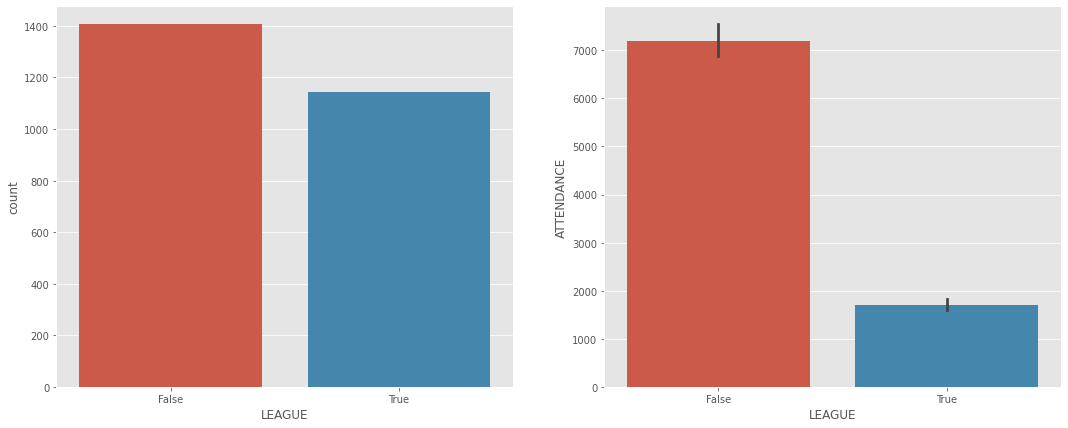

In [0]:
figure, ((ax1,ax2)) = plt.subplots(nrows=1, ncols=2)
figure.set_size_inches(18,7)

sns.countplot(data=data, x="LEAGUE" , ax=ax1)
sns.barplot(data=data, x="LEAGUE", y="ATTENDANCE", ax=ax2)

#### one-hot encording

In [0]:
data2 = pd.get_dummies(data, columns=["HOME"], prefix="HOME")
data2 = pd.get_dummies(data2, columns=["AWAY"], prefix="AWAY")  
data2.head()

,DATETIME,LEAGUE,HOLIDAY,STADIUM,ATTENDANCE,SEAT,WEATHER,TEMPERATURE,DUST,RANK,A_RANK,POPULATION,WIN,LOSE,RECORD,A_WIN,APPEAL,HIT,DERBY,OPENING,year,month,day,hour,minute,dayofweek,npop,nseat,nrecord,HOME_0,HOME_1,HOME_2,HOME_3,HOME_4,HOME_5,HOME_6,HOME_7,HOME_8,HOME_9,HOME_10,HOME_11,HOME_12,HOME_13,HOME_14,HOME_15,HOME_16,HOME_17,HOME_18,HOME_19,HOME_20,HOME_21,HOME_22,HOME_23,AWAY_0,AWAY_1,AWAY_2,AWAY_3,AWAY_4,AWAY_5,AWAY_6,AWAY_7,AWAY_8,AWAY_9,AWAY_10,AWAY_11,AWAY_12,AWAY_13,AWAY_14,AWAY_15,AWAY_16,AWAY_17,AWAY_18,AWAY_19,AWAY_20,AWAY_21,AWAY_22,AWAY_23
0,2013-03-02 15:00:00,False,False,False,18845,66704,3,27,49,0,0,9596993,0,0,0,0,False,True,False,True,2013,3,2,15,0,5,1.000000,0.948602,0.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2013-03-02 14:45:00,False,False,False,10156,43554,3,70,49,0,0,1149498,0,0,0,0,True,False,False,True,2013,3,2,14,45,5,0.110550,0.582038,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2013-03-02 15:00:00,False,False,False,7036,13496,3,75,49,0,0,1870368,0,0,0,0,False,False,False,True,2013,3,2,15,0,5,0.186451,0.106090,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,2013-03-03 14:00:00,False,False,False,8059,16146,3,31,49,0,0,943043,0,0,0,0,False,True,True,True,2013,3,3,14,0,6,0.088812,0.148051,0.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,2013-03-03 14:00:00,False,False,False,14901,20300,3,31,49,0,0,2926237,0,0,0,0,False,False,False,True,2013,3,3,14,0,6,0.297625,0.213827,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# training, test set 나누기


#### one-hot encording X

In [0]:
train2013 = data[data.year <= 2013]
train2014 = data[data.year <= 2014]
train2015 = data[data.year <= 2015]
train2016 = data[data.year <= 2016]
train2017 = data[data.year <= 2017]
train2018 = data[data.year <= 2018]

test2014 = data[data['year'].isin([2014])]
test2015 = data[data['year'].isin([2015])]
test2016 = data[data['year'].isin([2016])]
test2017 = data[data['year'].isin([2017])]
test2018 = data[data['year'].isin([2018])]

In [0]:
test2016.head()

,DATETIME,LEAGUE,HOLIDAY,HOME,AWAY,STADIUM,ATTENDANCE,SEAT,WEATHER,TEMPERATURE,DUST,RANK,A_RANK,POPULATION,WIN,LOSE,RECORD,A_WIN,APPEAL,HIT,DERBY,OPENING,year,month,day,hour,minute,dayofweek,npop,nseat,nrecord
1268,2016-03-12 14:00:00,False,False,20,9,False,32695,42477,3,84,45,0,0,1824898,0,0,0,0,False,True,True,True,2016,3,12,14,0,5,0.181664,0.564984,0.0
1269,2016-03-12 14:00:00,False,False,11,12,False,14504,16146,3,78,45,0,0,943043,0,0,0,0,False,True,True,True,2016,3,12,14,0,5,0.088812,0.148051,0.0
1270,2016-03-12 16:00:00,False,False,23,3,False,12141,17433,2,82,45,0,0,507081,0,0,0,0,True,False,False,True,2016,3,12,16,0,5,0.042909,0.168430,0.0
1271,2016-03-13 14:00:00,False,False,19,13,False,12808,13496,1,85,45,0,0,1870368,0,0,0,0,False,False,False,True,2016,3,13,14,0,6,0.186451,0.106090,0.0
1272,2016-03-13 14:00:00,False,False,21,18,False,6261,29791,2,94,45,0,0,661617,0,0,0,0,False,False,False,True,2016,3,13,14,0,6,0.059180,0.364110,0.0


##### 모든 변수

feature_names = ["LEAGUE","HOLIDAY", "HOME", "AWAY", "STADIUM","SEAT", 
                 "WEATHER","TEMPERATURE","DUST","RANK", "A_RANK", "POPULATION",
                 "WIN", "LOSE","RECORD","A_WIN", "APPEAL", "HIT", "DERBY", "OPENING",
                 "year","month", "hour" , "dayofweek", "npop", "nseat", "nrecord"]

feature_names

In [0]:
feature_names = ["LEAGUE","HOLIDAY", "HOME", "AWAY", "STADIUM", 
                 "WEATHER","TEMPERATURE","DUST","RANK", "A_RANK", 
                 "WIN", "LOSE","A_WIN", "APPEAL", "HIT", "DERBY", "OPENING",
                 "year","month", "hour" , "dayofweek", "npop", "nseat", "nrecord"]

feature_names

['LEAGUE',
 'HOLIDAY',
 'HOME',
 'AWAY',
 'STADIUM',
 'WEATHER',
 'TEMPERATURE',
 'DUST',
 'RANK',
 'A_RANK',
 'WIN',
 'LOSE',
 'A_WIN',
 'APPEAL',
 'HIT',
 'DERBY',
 'OPENING',
 'year',
 'month',
 'hour',
 'dayofweek',
 'npop',
 'nseat',
 'nrecord']

##### 제외

In [0]:
feature_names 0 = ["LEAGUE",  
                "TEMPERATURE","RANK",
                 "HIT", "DERBY", 
               "month","npop"]

feature_names 0

['LEAGUE', 'TEMPERATURE', 'RANK', 'HIT', 'DERBY', 'month', 'npop']

#### 셋

In [0]:
X_train0 = train2013[feature_names]

print(X_train0.shape)
X_train0.head()

(408, 24)


,LEAGUE,HOLIDAY,HOME,AWAY,STADIUM,WEATHER,TEMPERATURE,DUST,RANK,A_RANK,WIN,LOSE,A_WIN,APPEAL,HIT,DERBY,OPENING,year,month,hour,dayofweek,npop,nseat,nrecord
0,False,False,9,23,False,3,27,49,0,0,0,0,0,False,True,False,True,2013,3,15,5,1.000000,0.948602,0.0
1,False,False,17,4,False,3,70,49,0,0,0,0,0,True,False,False,True,2013,3,14,5,0.110550,0.582038,0.0
2,False,False,19,21,False,3,75,49,0,0,0,0,0,False,False,False,True,2013,3,15,5,0.186451,0.106090,0.0
3,False,False,11,12,False,3,31,49,0,0,0,0,0,False,True,True,True,2013,3,14,6,0.088812,0.148051,0.0
4,False,False,18,1,False,3,31,49,0,0,0,0,0,False,False,False,True,2013,3,14,6,0.297625,0.213827,0.0


In [0]:
label_name = "ATTENDANCE"

y_train0 = train2013[label_name]

print(y_train0.shape)
y_train0.head()

(408,)


0    18845
1    10156
2     7036
3     8059
4    14901
Name: ATTENDANCE, dtype: int64

In [0]:
X_test0 = test2014[feature_names]

print(X_test0.shape)
X_test0.head()

(412, 24)


,LEAGUE,HOLIDAY,HOME,AWAY,STADIUM,WEATHER,TEMPERATURE,DUST,RANK,A_RANK,WIN,LOSE,A_WIN,APPEAL,HIT,DERBY,OPENING,year,month,hour,dayofweek,npop,nseat,nrecord
408,False,False,23,17,False,3,93,55,0,0,0,0,0,False,False,False,True,2014,3,14,5,0.042909,0.168430,0.0
409,False,False,20,6,False,3,78,55,0,0,0,0,0,True,True,False,True,2014,3,16,5,0.181664,0.564984,0.0
410,False,False,9,19,False,3,67,55,0,0,0,0,0,True,True,False,True,2014,3,16,5,1.000000,0.948602,0.0
411,False,False,1,11,False,3,111,55,0,0,0,0,0,False,False,False,True,2014,3,14,6,0.342645,0.131741,0.0
412,False,False,8,18,False,3,48,55,0,0,0,0,0,False,False,False,True,2014,3,14,6,0.000000,0.130570,0.0


In [0]:
X_train1 = train2014[feature_names]
y_train1 = train2014[label_name]

X_train2 = train2015[feature_names]
y_train2 = train2015[label_name]

X_train3 = train2016[feature_names]
y_train3 = train2016[label_name]

X_train4 = train2017[feature_names]
y_train4 = train2017[label_name]

X_test1 = test2015[feature_names]
X_test2 = test2016[feature_names]
X_test3 = test2017[feature_names]
X_test4 = test2018[feature_names]

# score

#### rmsle

underfitting


In [0]:
from sklearn.metrics import make_scorer

def rmsle(predicted_values, actual_values, convertExp=False):

    if convertExp:
        predicted_values = np.exp(predicted_values),
        actual_values = np.exp(actual_values)
        
    # 넘파이로 배열 형태로 바꿔준다.
    predicted_values = np.array(predicted_values)
    actual_values = np.array(actual_values)
    
    # 예측값과 실제 값에 1을 더하고 로그를 씌워준다.
    # 값이 0일 수도 있어서 로그를 취했을 때 마이너스 무한대가 될 수도 있기 때문에 1을 더해 줌
    # 로그를 씌워주는 것은 정규분포로 만들어주기 위해
    log_predict = np.log(predicted_values + 1)
    log_actual = np.log(actual_values + 1)
    
    # 위에서 계산한 예측값에서 실제값을 빼주고 제곱을 해준다.
    difference = log_predict - log_actual
    difference = np.square(difference)
    
    # 평균을 낸다.
    mean_difference = difference.mean()
    
    # 다시 루트를 씌운다.
    score = np.sqrt(mean_difference)
    
    return score
  
rmsle_scorer = make_scorer(rmsle)
rmsle_scorer

make_scorer(rmsle)

#### r square

In [0]:
from sklearn.metrics import r2_score


# modeling

#### 교차검증

In [0]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

#### Random Forest

In [0]:
from sklearn.ensemble import RandomForestRegressor

max_depth_list = []

model = RandomForestRegressor(n_estimators=1200,
                              n_jobs=-1,
                              random_state=0)


In [0]:
%time score = cross_val_score(model, X_train0, y_train0, cv=k_fold, scoring=rmsle_scorer)
score = score.mean()
# 0에 근접할수록 좋은 데이터
print("Score= {0:.5f}".format(score))

CPU times: user 14.2 s, sys: 1.23 s, total: 15.4 s
Wall time: 41.3 s
Score= 0.62340


In [0]:
%time score = cross_val_score(model, X_train1, y_train1, cv=k_fold, scoring=rmsle_scorer)
score = score.mean()
# 0에 근접할수록 좋은 데이터
print("Score= {0:.5f}".format(score))

CPU times: user 15.1 s, sys: 1.42 s, total: 16.5 s
Wall time: 1min
Score= 0.60301


In [0]:
%time score = cross_val_score(model, X_train2, y_train2, cv=k_fold, scoring=rmsle_scorer)
score = score.mean()
# 0에 근접할수록 좋은 데이터
print("Score= {0:.5f}".format(score))

CPU times: user 16.5 s, sys: 1.74 s, total: 18.2 s
Wall time: 1min 26s
Score= 0.58859


In [0]:
%time score = cross_val_score(model, X_train3, y_train3, cv=k_fold, scoring=rmsle_scorer)
score = score.mean()
# 0에 근접할수록 좋은 데이터
print("Score= {0:.5f}".format(score))

CPU times: user 17.7 s, sys: 2.02 s, total: 19.7 s
Wall time: 1min 51s
Score= 0.58963


In [0]:
%time score = cross_val_score(model, X_train4, y_train4, cv=k_fold, scoring=rmsle_scorer)
score = score.mean()
# 0에 근접할수록 좋은 데이터
print("Score= {0:.5f}".format(score))

CPU times: user 18.9 s, sys: 2.32 s, total: 21.2 s
Wall time: 2min 14s
Score= 0.57008


#### 선형회귀모델

In [0]:
import pandas as pd
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
import warnings

pd.options.mode.chained_assignment = None
warnings.filterwarnings("ignore", category=DeprecationWarning)

# 선형회귀 모델을 초기화
lModel = LinearRegression()

# 모델을 학습시킨다.
y_train0_log = np.log1p(y_train0)
lModel.fit(X_train0, y_train0_log)

# 예측하고 정확도를 평가한다.
preds = lModel.predict(X_train0)
print ("RMSLE Value For Linear Regression: ",
       rmsle(np.exp(y_train0_log),np.exp(preds), False))

RMSLE Value For Linear Regression:  0.5740994804984716


In [0]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
import warnings

pd.options.mode.chained_assignment = None
warnings.filterwarnings("ignore", category=DeprecationWarning)

# 선형회귀 모델을 초기화
lModel = LinearRegression()

# 모델을 학습시킨다.
y_train1_log = np.log1p(y_train1)
lModel.fit(X_train1, y_train1_log)

# 예측하고 정확도를 평가한다.
preds = lModel.predict(X_train1)
print ("RMSLE Value For Linear Regression: ",
       rmsle(np.exp(y_train1_log),np.exp(preds), False))

RMSLE Value For Linear Regression:  0.5954886732617353


In [0]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
import warnings

pd.options.mode.chained_assignment = None
warnings.filterwarnings("ignore", category=DeprecationWarning)

# 선형회귀 모델을 초기화
lModel = LinearRegression()

# 모델을 학습시킨다.
y_train2_log = np.log1p(y_train2)
lModel.fit(X_train2, y_train2_log)

# 예측하고 정확도를 평가한다.
preds = lModel.predict(X_train2)
print ("RMSLE Value For Linear Regression: ",
       rmsle(np.exp(y_train2_log),np.exp(preds), False))

RMSLE Value For Linear Regression:  0.6112504955010046


In [0]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
import warnings

pd.options.mode.chained_assignment = None
warnings.filterwarnings("ignore", category=DeprecationWarning)

# 선형회귀 모델을 초기화
lModel = LinearRegression()

# 모델을 학습시킨다.
y_train3_log = np.log1p(y_train3)
lModel.fit(X_train3, y_train3_log)

# 예측하고 정확도를 평가한다.
preds = lModel.predict(X_train3)
print ("RMSLE Value For Linear Regression: ",
       rmsle(np.exp(y_train3_log),np.exp(preds), False))

RMSLE Value For Linear Regression:  0.6205443143597342


In [0]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
import warnings

pd.options.mode.chained_assignment = None
warnings.filterwarnings("ignore", category=DeprecationWarning)

# 선형회귀 모델을 초기화
lModel = LinearRegression()

# 모델을 학습시킨다.
y_train4_log = np.log1p(y_train4)
lModel.fit(X_train4, y_train4_log)

# 예측하고 정확도를 평가한다.
preds = lModel.predict(X_train4)
print ("RMSLE Value For Linear Regression: ",
       rmsle(np.exp(y_train4_log),np.exp(preds), False))

RMSLE Value For Linear Regression:  0.6259345626791333


#### ridge

In [0]:
ridge_m_ = Ridge()
ridge_params_ = { 'max_iter':[3000],'alpha':[0.01, 0.1, 1, 2, 3, 4, 10, 30,100,200,300,400,800,900,1000]}
rmsle_scorer = metrics.make_scorer(rmsle, greater_is_better=False)
grid_ridge_m = GridSearchCV( ridge_m_,
                          ridge_params_,
                          scoring = rmsle_scorer,
                          cv=5)

y_train0_log = np.log1p(y_train0)
grid_ridge_m.fit( X_train0, y_train0_log )
preds = grid_ridge_m.predict(X_train0)
print (grid_ridge_m.best_params_)
print ("RMSLE Value For Ridge Regression: ", rmsle(np.exp(y_train0_log),np.exp(preds), False))


{'alpha': 2, 'max_iter': 3000}
RMSLE Value For Ridge Regression:  0.5745543775803899


In [0]:
ridge_m_ = Ridge()
ridge_params_ = { 'max_iter':[3000],'alpha':[0.01, 0.1, 1, 2, 3, 4, 10, 30,100,200,300,400,800,900,1000]}
rmsle_scorer = metrics.make_scorer(rmsle, greater_is_better=False)
grid_ridge_m = GridSearchCV( ridge_m_,
                          ridge_params_,
                          scoring = rmsle_scorer,
                          cv=5)

y_train1_log = np.log1p(y_train1)
grid_ridge_m.fit( X_train1, y_train1_log )
preds = grid_ridge_m.predict(X_train1)
print (grid_ridge_m.best_params_)
print ("RMSLE Value For Ridge Regression: ", rmsle(np.exp(y_train1_log),np.exp(preds), False))


{'alpha': 3, 'max_iter': 3000}
RMSLE Value For Ridge Regression:  0.5958833206631274


In [0]:
ridge_m_ = Ridge()
ridge_params_ = { 'max_iter':[3000],'alpha':[0.01, 0.1, 1, 2, 3, 4, 10, 30,100,200,300,400,800,900,1000]}
rmsle_scorer = metrics.make_scorer(rmsle, greater_is_better=False)
grid_ridge_m = GridSearchCV( ridge_m_,
                          ridge_params_,
                          scoring = rmsle_scorer,
                          cv=5)

y_train2_log = np.log1p(y_train2)
grid_ridge_m.fit( X_train2, y_train2_log )
preds = grid_ridge_m.predict(X_train2)
print (grid_ridge_m.best_params_)
print ("RMSLE Value For Ridge Regression: ", rmsle(np.exp(y_train2_log),np.exp(preds), False))


{'alpha': 10, 'max_iter': 3000}
RMSLE Value For Ridge Regression:  0.613006706747341


In [0]:
ridge_m_ = Ridge()
ridge_params_ = { 'max_iter':[3000],'alpha':[0.01, 0.1, 1, 2, 3, 4, 10, 30,100,200,300,400,800,900,1000]}
rmsle_scorer = metrics.make_scorer(rmsle, greater_is_better=False)
grid_ridge_m = GridSearchCV( ridge_m_,
                          ridge_params_,
                          scoring = rmsle_scorer,
                          cv=5)

y_train3_log = np.log1p(y_train3)
grid_ridge_m.fit( X_train3, y_train3_log )
preds = grid_ridge_m.predict(X_train3)
print (grid_ridge_m.best_params_)
print ("RMSLE Value For Ridge Regression: ", rmsle(np.exp(y_train3_log),np.exp(preds), False))


{'alpha': 0.1, 'max_iter': 3000}
RMSLE Value For Ridge Regression:  0.6205443901546549


In [0]:
ridge_m_ = Ridge()
ridge_params_ = { 'max_iter':[3000],'alpha':[0.01, 0.1, 1, 2, 3, 4, 10, 30,100,200,300,400,800,900,1000]}
rmsle_scorer = metrics.make_scorer(rmsle, greater_is_better=False)
grid_ridge_m = GridSearchCV( ridge_m_,
                          ridge_params_,
                          scoring = rmsle_scorer,
                          cv=5)

y_train4_log = np.log1p(y_train4)
grid_ridge_m.fit( X_train4, y_train4_log )
preds = grid_ridge_m.predict(X_train4)
print (grid_ridge_m.best_params_)
print ("RMSLE Value For Ridge Regression: ", rmsle(np.exp(y_train4_log),np.exp(preds), False))


{'alpha': 1, 'max_iter': 3000}
RMSLE Value For Ridge Regression:  0.6259429984895251


#### lasso

In [0]:
lasso_m_ = Lasso()

alpha  = 1/np.array([0.1, 1, 2, 3, 4, 10, 30,100,200,300,400,800,900,1000])
lasso_params_ = { 'max_iter':[3000],'alpha':alpha}

grid_lasso_m = GridSearchCV( lasso_m_,lasso_params_,scoring = rmsle_scorer,cv=5)
y_train0_log = np.log1p(y_train0)
grid_lasso_m.fit( X_train0 , y_train0_log )
preds = grid_lasso_m.predict(X_train0)
print (grid_lasso_m.best_params_)
print ("RMSLE Value For Lasso Regression: ",rmsle(np.exp(y_train0_log),np.exp(preds),False))


{'alpha': 0.005, 'max_iter': 3000}
RMSLE Value For Lasso Regression:  0.5777426498785673


In [0]:
lasso_m_ = Lasso()

alpha  = 1/np.array([0.1, 1, 2, 3, 4, 10, 30,100,200,300,400,800,900,1000])
lasso_params_ = { 'max_iter':[3000],'alpha':alpha}

grid_lasso_m = GridSearchCV( lasso_m_,lasso_params_,scoring = rmsle_scorer,cv=5)
y_train1_log = np.log1p(y_train1)
grid_lasso_m.fit( X_train1 , y_train1_log )
preds = grid_lasso_m.predict(X_train1)
print (grid_lasso_m.best_params_)
print ("RMSLE Value For Lasso Regression: ",rmsle(np.exp(y_train1_log),np.exp(preds),False))


{'alpha': 0.01, 'max_iter': 3000}
RMSLE Value For Lasso Regression:  0.6052905808153651


In [0]:
lasso_m_ = Lasso()

alpha  = 1/np.array([0.1, 1, 2, 3, 4, 10, 30,100,200,300,400,800,900,1000])
lasso_params_ = { 'max_iter':[3000],'alpha':alpha}

grid_lasso_m = GridSearchCV( lasso_m_,lasso_params_,scoring = rmsle_scorer,cv=5)
y_train2_log = np.log1p(y_train2)
grid_lasso_m.fit( X_train2 , y_train2_log )
preds = grid_lasso_m.predict(X_train2)
print (grid_lasso_m.best_params_)
print ("RMSLE Value For Lasso Regression: ",rmsle(np.exp(y_train2_log),np.exp(preds),False))


{'alpha': 0.005, 'max_iter': 3000}
RMSLE Value For Lasso Regression:  0.616098253590238


In [0]:
lasso_m_ = Lasso()

alpha  = 1/np.array([0.1, 1, 2, 3, 4, 10, 30,100,200,300,400,800,900,1000])
lasso_params_ = { 'max_iter':[3000],'alpha':alpha}

grid_lasso_m = GridSearchCV( lasso_m_,lasso_params_,scoring = rmsle_scorer,cv=5)
y_train3_log = np.log1p(y_train3)
grid_lasso_m.fit( X_train3 , y_train3_log )
preds = grid_lasso_m.predict(X_train3)
print (grid_lasso_m.best_params_)
print ("RMSLE Value For Lasso Regression: ",rmsle(np.exp(y_train3_log),np.exp(preds),False))


{'alpha': 0.00125, 'max_iter': 3000}
RMSLE Value For Lasso Regression:  0.6208269753515256


In [0]:
lasso_m_ = Lasso()

alpha  = 1/np.array([0.1, 1, 2, 3, 4, 10, 30,100,200,300,400,800,900,1000])
lasso_params_ = { 'max_iter':[3000],'alpha':alpha}

grid_lasso_m = GridSearchCV( lasso_m_,lasso_params_,scoring = rmsle_scorer,cv=5)
y_train4_log = np.log1p(y_train4)
grid_lasso_m.fit( X_train4 , y_train4_log )
preds = grid_lasso_m.predict(X_train4)
print (grid_lasso_m.best_params_)
print ("RMSLE Value For Lasso Regression: ",rmsle(np.exp(y_train4_log),np.exp(preds),False))


{'alpha': 0.00125, 'max_iter': 3000}
RMSLE Value For Lasso Regression:  0.6262430416266704


#### 앙상블 -rm

In [0]:
from sklearn.ensemble import RandomForestRegressor
rfModel = RandomForestRegressor(n_estimators=100)

y_train0_log = np.log1p(y_train0)
rfModel.fit(X_train0, y_train0_log)

preds = rfModel.predict(X_train0)
score = rmsle(np.exp(y_train0_log),np.exp(preds),False)
print ("RMSLE Value For Random Forest: ",score)

RMSLE Value For Random Forest:  0.20370013349022142


In [0]:
predsTest0 = rfModel.predict(X_test0)
label_name = [ "DATETIME","ATTENDANCE" ]
y_test0 = test2014[label_name]
y_test0["predictions"] = np.exp(predsTest0)
y_test0.head()
rmsle0=rmsle(y_test0["predictions"], y_test0["ATTENDANCE"],False)
rmsle0


0.715414796552073

In [0]:
from sklearn.ensemble import RandomForestRegressor
rfModel = RandomForestRegressor(n_estimators=100)

y_train1_log = np.log1p(y_train1)
rfModel.fit(X_train1, y_train1_log)

preds = rfModel.predict(X_train1)
score = rmsle(np.exp(y_train1_log),np.exp(preds),False)
print ("RMSLE Value For Random Forest: ",score)

RMSLE Value For Random Forest:  0.19666795366534767


In [0]:
predsTest1 = rfModel.predict(X_test1)
label_name = [ "DATETIME","ATTENDANCE" ]
y_test1 = test2015[label_name]
y_test1["predictions"] = np.exp(predsTest1)
y_test1.head()
rmsle1=rmsle(y_test1["predictions"], y_test1["ATTENDANCE"],False)
rmsle1


0.6643839189901679

In [0]:
from sklearn.ensemble import RandomForestRegressor
rfModel = RandomForestRegressor(n_estimators=100)

y_train2_log = np.log1p(y_train2)
rfModel.fit(X_train2, y_train2_log)

preds = rfModel.predict(X_train2)
score = rmsle(np.exp(y_train2_log),np.exp(preds),False)
print ("RMSLE Value For Random Forest: ",score)

RMSLE Value For Random Forest:  0.19873321289470708


In [0]:
predsTest2 = rfModel.predict(X_test2)
label_name = [ "DATETIME","ATTENDANCE" ]
y_test2 = test2016[label_name]
y_test2["predictions"] = np.exp(predsTest2)
y_test2.head()
rmsle2=rmsle(y_test2["predictions"], y_test2["ATTENDANCE"],False)
rmsle2


0.6198962335767072

In [0]:
from sklearn.ensemble import RandomForestRegressor
rfModel = RandomForestRegressor(n_estimators=100)

y_train_log = np.log1p(y_train3)
rfModel.fit(X_train3, y_train3_log)

preds = rfModel.predict(X_train3)
score = rmsle(np.exp(y_train3_log),np.exp(preds),False)
print ("RMSLE Value For Random Forest: ",score)

RMSLE Value For Random Forest:  0.19566793712730243


In [0]:
predsTest3 = rfModel.predict(X_test3)
label_name = [ "DATETIME","ATTENDANCE" ]
y_test3 = test2017[label_name]
y_test3["predictions"] = np.exp(predsTest3)
y_test3.head()
rmsle3=rmsle(y_test3["predictions"], y_test3["ATTENDANCE"],False)
rmsle3


0.6218264446698081

In [0]:
from sklearn.ensemble import RandomForestRegressor
rfModel = RandomForestRegressor(n_estimators=100)

y_train_log = np.log1p(y_train4)
rfModel.fit(X_train4, y_train4_log)

preds = rfModel.predict(X_train4)
score = rmsle(np.exp(y_train4_log),np.exp(preds),False)
print ("RMSLE Value For Random Forest: ",score)

RMSLE Value For Random Forest:  0.19468074058477586


In [0]:
predsTest4 = rfModel.predict(X_test4)
label_name = [ "DATETIME","ATTENDANCE" ]
y_test4 = test2018[label_name]
y_test4["predictions"] = np.exp(predsTest4)
y_test4.head()
rmsle4=rmsle(y_test4["predictions"], y_test4["ATTENDANCE"],False)
rmsle4

0.7138032363506339

#### 앙상블 -gb

rmsle ,r2

In [0]:
from sklearn.ensemble import GradientBoostingRegressor
gbm = GradientBoostingRegressor(n_estimators=400, alpha=0.01, learning_rate=0.1);

y_train0_log = np.log1p(y_train0)
gbm.fit(X_train0, y_train0_log)

preds = gbm.predict(X_train0)
score0 = rmsle(np.exp(y_train0_log),np.exp(preds),False)
print ("RMSLE Value For Gradient Boost: ", score0)


RMSLE Value For Gradient Boost:  0.11774639254689222


In [0]:
a0=r2_score(y_test0["predictions"], y_test0["ATTENDANCE"])

In [0]:
r2_0=r2_score(np.exp(y_train0_log),np.exp(preds))
r2_0

0.967068008353177

In [0]:
predsTest0 = gbm.predict(X_test0)
label_name = [ "DATETIME","ATTENDANCE" ]
y_test0 = test2014[label_name]
y_test0["predictions"] = np.exp(predsTest0)
y_test0.head()
rmsle0=rmsle(y_test0["predictions"], y_test0["ATTENDANCE"],False)
rmsle0


0.6957288250872314

In [0]:


y_train1_log = np.log1p(y_train1)
gbm.fit(X_train1, y_train1_log)

preds = gbm.predict(X_train1)
score1 = rmsle(np.exp(y_train1_log),np.exp(preds),False)
r2_1=r2_score(np.exp(y_train1_log),np.exp(preds))
print ("RMSLE Value For Gradient Boost: ", score1)
r2_1


RMSLE Value For Gradient Boost:  0.2022938400406996


0.9390691179557674

In [0]:
predsTest1 = gbm.predict(X_test1)
label_name = [ "DATETIME","ATTENDANCE" ]
y_test1 = test2015[label_name]
y_test1["predictions"] = np.exp(predsTest1)
y_test1.head()
rmsle1=rmsle(y_test1["predictions"], y_test1["ATTENDANCE"],False)
rmsle1


0.6787293912559421

In [0]:

a1=r2_score(y_test1["predictions"], y_test1["ATTENDANCE"])

In [0]:


y_train2_log = np.log1p(y_train2)
gbm.fit(X_train2, y_train2_log)

preds = gbm.predict(X_train2)
score2 = rmsle(np.exp(y_train2_log),np.exp(preds),False)
print ("RMSLE Value For Gradient Boost: ", score2)

RMSLE Value For Gradient Boost:  0.27467470721384957


In [0]:
r2_2=r2_score(np.exp(y_train2_log),np.exp(preds))
r2_2

0.8885293454012284

In [0]:
predsTest2 = gbm.predict(X_test2)
label_name = [ "DATETIME","ATTENDANCE" ]
y_test2 = test2016[label_name]
y_test2["predictions"] = np.exp(predsTest2)
y_test2.head()
rmsle2=rmsle(y_test2["predictions"], y_test2["ATTENDANCE"],False)
rmsle2

0.6277434883398096

In [0]:
a2=r2_score(y_test2["predictions"], y_test2["ATTENDANCE"])

In [0]:
from sklearn.ensemble import GradientBoostingRegressor
gbm = GradientBoostingRegressor(n_estimators=4000, alpha=0.01);

y_train3_log = np.log1p(y_train3)
gbm.fit(X_train3, y_train3_log)

preds = gbm.predict(X_train3)
score3 = rmsle(np.exp(y_train3_log),np.exp(preds),False)
print ("RMSLE Value For Gradient Boost: ", score3)

RMSLE Value For Gradient Boost:  0.054032975374493274


In [0]:
r2_3=r2_score(np.exp(y_train3_log),np.exp(preds))
r2_3

0.9946491107610584

In [0]:
predsTest3 = gbm.predict(X_test3)
label_name = [ "DATETIME","ATTENDANCE" ]
y_test3 = test2017[label_name]
y_test3["predictions"] = np.exp(predsTest3)
y_test3.head()
rmsle3=rmsle(y_test3["predictions"], y_test3["ATTENDANCE"],False)
rmsle3

0.6469898867299954

In [0]:
a3=r2_score(y_test3["predictions"], y_test3["ATTENDANCE"])

In [0]:


y_train4_log = np.log1p(y_train4)
gbm.fit(X_train4, y_train4_log)

preds = gbm.predict(X_train4)
score4 = rmsle(np.exp(y_train4_log),np.exp(preds),False)
print ("RMSLE Value For Gradient Boost: ", score4)

RMSLE Value For Gradient Boost:  0.08121330838298105


In [0]:
r2_4=r2_score(np.exp(y_train4_log),np.exp(preds))
r2_4

0.9895730167607795

In [0]:
predsTest4 = gbm.predict(X_test4)
label_name = [ "DATETIME","ATTENDANCE" ]
y_test4 = test2018[label_name]
y_test4["predictions"] = np.exp(predsTest4)
y_test4.head()
rmsle4=rmsle(y_test4["predictions"], y_test4["ATTENDANCE"],False)
rmsle4

0.720467040207371

In [0]:
a4=r2_score(y_test4["predictions"], y_test4["ATTENDANCE"])

In [0]:
score_=[]
score_.append(score0)
score_.append(score1)
score_.append(score2)
score_.append(score3)
score_.append(score4)

score_

[0.11774639254689222,
 0.2022938400406996,
 0.27467470721384957,
 0.054032975374493274,
 0.08121330838298105]

# 예측

In [0]:
predsTest0 = gbm.predict(X_test0)
label_name = [ "DATETIME","ATTENDANCE" ]
y_test0 = test2014[label_name]
y_test0["predictions"] = np.exp(predsTest0)
y_test0.head()
rmsle0=rmsle(y_test0["predictions"], y_test0["ATTENDANCE"],False)
rmsle0


0.0834503104649429

In [0]:
rmsle0=rmsle(y_test0["predictions"], y_test0["ATTENDANCE"],False)
rmsle0

0.0834503104649429

In [0]:
predsTest1 = gbm.predict(X_test1)
label_name = [ "DATETIME","ATTENDANCE" ]
y_test1 = test2015[label_name]
y_test1["predictions"] = np.exp(predsTest1)
y_test1.head()


,DATETIME,ATTENDANCE,predictions
818,2015-03-07 15:00:00,23810,23542.463480
819,2015-03-07 14:00:00,8012,8416.252780
820,2015-03-07 16:00:00,9082,9529.106307
821,2015-03-08 14:00:00,12608,12278.495936
822,2015-03-08 14:00:00,17573,17136.369412


In [0]:
rmsle1=rmsle(y_test1["predictions"], y_test1["ATTENDANCE"],False)

In [0]:
predsTest2 = gbm.predict(X_test2)
label_name = [ "DATETIME","ATTENDANCE" ]
y_test2 = test2016[label_name]
y_test2["predictions"] = np.exp(predsTest2)
rmsle2=rmsle(y_test2["predictions"], y_test2["ATTENDANCE"],False)

In [0]:
predsTest3 = gbm.predict(X_test3)
y_test3 = test2017[label_name]
y_test3["predictions"] = np.exp(predsTest3)
rmsle3=rmsle(y_test3["predictions"], y_test3["ATTENDANCE"],False)

In [0]:
predsTest4 = gbm.predict(X_test4)
y_test4 = test2018[label_name]
y_test4["predictions"] = np.exp(predsTest4)
rmsle4=rmsle(y_test4["predictions"], y_test4["ATTENDANCE"],False)

In [0]:
rmsle_a=[]
rmsle_a.append(rmsle0)
rmsle_a.append(rmsle1)
rmsle_a.append(rmsle2)
rmsle_a.append(rmsle3)
rmsle_a.append(rmsle4)

rmsle_a


[0.0834503104649429,
 0.08761683394276133,
 0.07449607695019571,
 0.08645709743815674,
 0.720467040207371]

# result

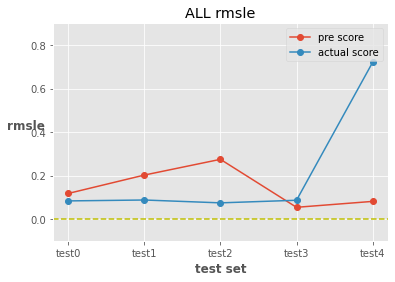

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from pylab import legend
from pylab import plot, show
from pylab import axis, xlabel, ylabel

x=score_
y=rmsle_a
z=['test0', 'test1','test2','test3','test4']

plot(z,x,z,y,marker='o')
axis(ymax=1)
legend(['pre score','actual score'],loc='best')
xlabel('test set',weight='bold' )
ylabel('rmsle',rotation=0, weight='bold')
plt.title("ALL rmsle")
#plt.xticks(np.arange(14,19,1))
plt.ylim(-0.1,0.9)
plt.axhline(y=0,color='y',linestyle='--')
show()

In [0]:
r2_pr=[]
r2_pr.append(r2_0)
r2_pr.append(r2_1)
r2_pr.append(r2_2)
r2_pr.append(r2_3)
r2_pr.append(r2_4)

r2_pr

[0.967068008353177,
 0.9390691179557674,
 0.8885293454012284,
 0.9946491107610584,
 0.9895730167607795]

In [0]:
r2_a=[]
r2_a.append(a0)
r2_a.append(a1)
r2_a.append(a2)
r2_a.append(a3)
r2_a.append(a4)

r2_pr

[0.967068008353177,
 0.9390691179557674,
 0.8885293454012284,
 0.9946491107610584,
 0.9895730167607795]

In [0]:
df=pd.DataFrame(r2_a)
df.to_csv("r2_lee.csv")

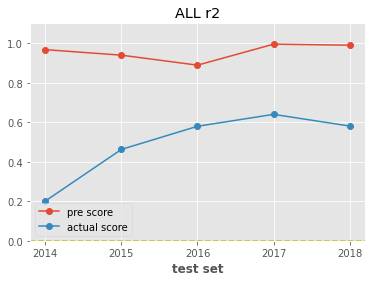

In [0]:
x=r2_pr
y=r2_a
z=['2014', '2015','2016','2017','2018']

plot(z,x,z,y,marker='o')
axis(ymax=1)
legend(['pre score','actual score'],loc='best')
xlabel('test set',weight='bold' )
ylabel('',rotation=0, weight='bold')
plt.title("ALL r2")
#plt.xticks(np.arange(14,19,1))
plt.ylim(0,1.1)
#plt.yticks("")
plt.axhline(y=0,color='y',linestyle='--')
show()

['DATETIME', 'ATTENDANCE', 'predictions']
2
[  1.03884853 -79.9189194 ]
['DATETIME', 'ATTENDANCE', 'predictions']
2
[  1.02406902 -44.36259218]
['DATETIME', 'ATTENDANCE', 'predictions']
2
[ 1.02018265 -4.12039288]
['DATETIME', 'ATTENDANCE', 'predictions']
2
[  1.0244253  -57.44622457]
['DATETIME', 'ATTENDANCE', 'predictions']
2
[  0.69079417 577.91736256]


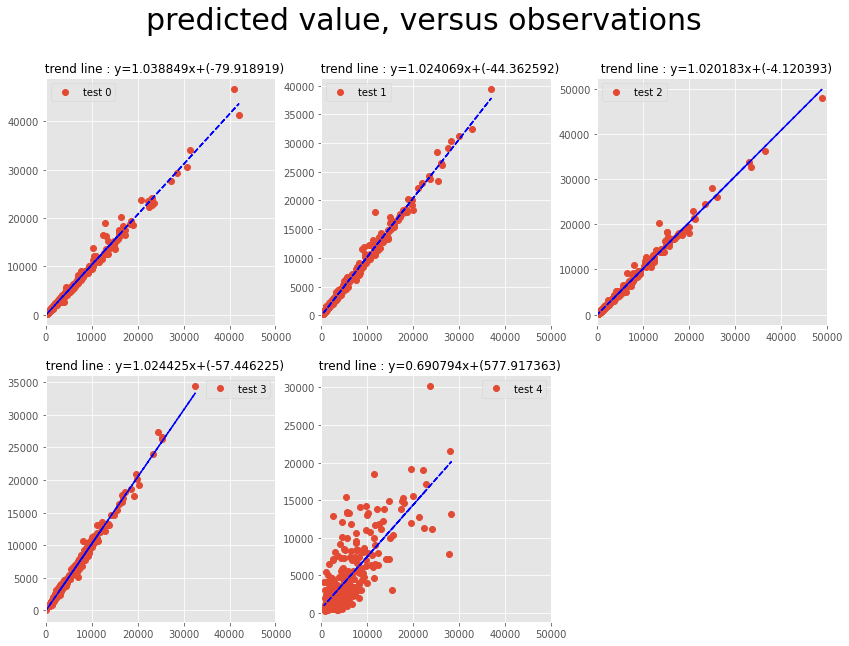

In [0]:
import numpy as np
import pandas
from matplotlib import pylab
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

#ATTENDANCE	predictions
#font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
#rc('font', family=font_name)
num=1
# y = str(i)
for y_ in [y_test0,y_test1,y_test2,y_test3,y_test4]:
  origin_df = y_
  print(list(origin_df.columns))
  submission = pandas.DataFrame()
  submission = origin_df

  print(len(submission.shape))

  plt.figure(123123123123123123123,figsize=(14, 10))
  plt.subplot(2, 3, num)
  plt.xlabel('', size=10) #x라벨
  plt.ylabel('', rotation=0,size=10)   # y라벨
  plt.xlim(0, 50000) 
  #plt.ylim(0, 50000)
  # plt.plot(range(len(submission['차이'].index)),submission['차이'])
  # pylab.scatter(submission['관중수'], submission['예측관중수'])
  x = submission['predictions'] # x축에 넣을 column
  y = submission['ATTENDANCE'] # y축에 넣을 column
  z = np.polyfit(x, y, 1)
  print(z)
  p = np.poly1d(z)
  pylab.plot(x, y, 'o',label='test '+str(num-1))
  plt.legend()
  pylab.plot(x, p(x),'b--')
  
  plt.title(  '  trend line : y=%.6fx+(%.6f)' % (z[0], z[1]), size=12)
  plt.suptitle('predicted value, versus observations', size=30)
  num+=1
plt.show()

In [0]:
y_test0.head()

,DATETIME,ATTENDANCE,predictions
408,2014-03-08 14:00:00,16127,16055.347110
409,2014-03-08 16:00:00,15687,15817.423160
410,2014-03-08 16:00:00,13674,13385.122377
411,2014-03-09 14:00:00,10943,10889.413111
412,2014-03-09 14:00:00,6469,6371.565656


# feature

In [0]:
gbm.feature_importances_

array([0.43683054, 0.00147331, 0.08427437, 0.01481378, 0.00474507,
       0.00603818, 0.03490211, 0.01279556, 0.04675909, 0.01316528,
       0.0075613 , 0.00856315, 0.00645401, 0.00198972, 0.07794502,
       0.01045012, 0.00089755, 0.02603799, 0.05061244, 0.01104285,
       0.02769397, 0.0260671 , 0.06516741, 0.02372005])

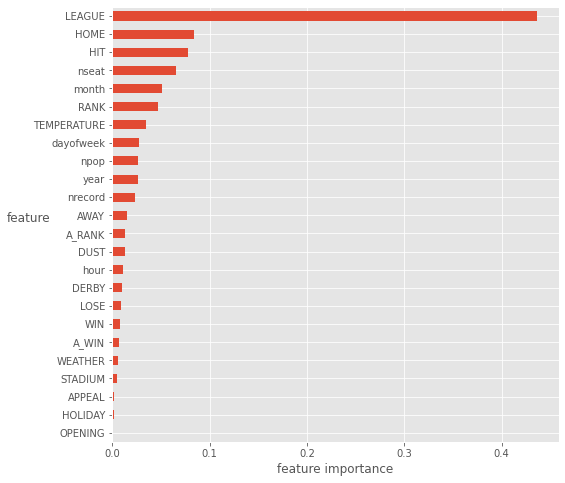

In [0]:
from pandas import Series
feature_importance = gbm.feature_importances_
Series_feat_imp = Series(feature_importance, index=X_test0.columns)

plt.figure(figsize=(8, 8))
Series_feat_imp.sort_values().plot.barh()
plt.xlabel('feature importance')
plt.ylabel('feature', rotation=0)
plt.show()